<a href="https://colab.research.google.com/github/moshekranc-git/pythonplayground/blob/master/santandar1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

from collections import Counter

# File system manangement
import os

# Suppress warnings
#import warnings
#warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Training data shape:  (20142, 202)


Head
    ID_code  target    var_0   var_1  ...  var_196  var_197  var_198  var_199
0  train_0       0   8.9255 -6.7863  ...   7.8784   8.5635  12.7803  -1.0914
1  train_1       0  11.5006 -4.1473  ...   8.1267   8.7889  18.3560   1.9518
2  train_2       0   8.6093 -2.7457  ...  -6.5213   8.2675  14.7222   0.3965
3  train_3       0  11.0604 -2.1518  ...  -2.9275  10.2922  17.9697  -8.9996
4  train_4       0   9.8369 -1.4834  ...   3.9267   9.5031  17.9974  -8.8104

[5 rows x 202 columns]


dtypes
 ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object


dtype value counts
 float64    200
object       1
int64        1
dtype: int64


Describe


target:

Class=0, Count=18159, Percentage=90.155%
Class=1, Count=1983, Percentage=9.845%


float64    200
object       1
int64        1
dtype: int64

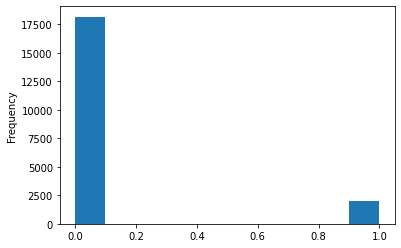

In [2]:
# Training data
app_train = pd.read_csv('train.csv')
print('Training data shape: ', app_train.shape)
print('\n\nHead\n', app_train.head())
print('\n\ndtypes\n', app_train.dtypes)
print('\n\ndtype value counts\n', app_train.dtypes.value_counts())
print('\n\nDescribe\n')
app_train.describe()

# summarize the class distribution
print("\ntarget:\n")
target = app_train['target'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
app_train['target'].astype(int).plot.hist();

# Number of each type of column
app_train.dtypes.value_counts()

very unbalanced! we will have to do something to balance it.

which field is the categorical field?

In [3]:
# select categorical features
  cat_columns = app_train.select_dtypes(include=['object', 'bool']).columns
  print('cat_columns =', cat_columns, '\n')

  # select numerical features
  num_columns = app_train.select_dtypes(include=['int64', 'float64']).columns
  print('num_columns =', num_columns, '\n')


cat_columns = Index(['ID_code'], dtype='object') 

num_columns = Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201) 



it's really an index, starting from 0, disguised as a category by the preceding text 'test_'

In [0]:
# Function to calculate missing values by column 
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
        
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
        
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
        
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

In [5]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(100)

Your selected dataframe has 202 columns.
There are 176 columns that have missing values.


Missing Values  % of Total Values
var_24                1                0.0
var_25                1                0.0
var_136               1                0.0
var_137               1                0.0
var_138               1                0.0
...                 ...                ...
var_52                1                0.0
var_53                1                0.0
var_54                1                0.0
var_55                1                0.0
var_57                1                0.0

[100 rows x 2 columns]

only one missing value for each of 105 columns. maybe a single row that is half blank?


In [6]:
null_columns=app_train.columns[app_train.isnull().any()]
print(app_train[app_train.isnull().any(axis=1)][null_columns].head())

       var_24  var_25  var_26  var_27  ...  var_196  var_197  var_198  var_199
20141     NaN     NaN     NaN     NaN  ...      NaN      NaN      NaN      NaN

[1 rows x 176 columns]


so it is one row that has all the blanks - row 6947 - should be deleted


 target 



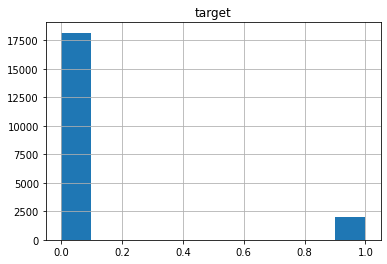


 var_0 



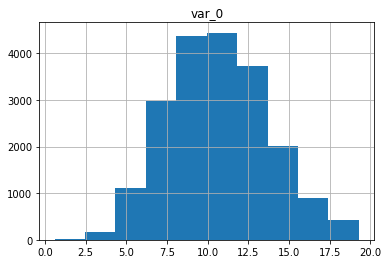


 var_1 



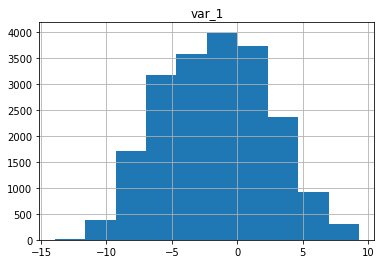


 var_2 



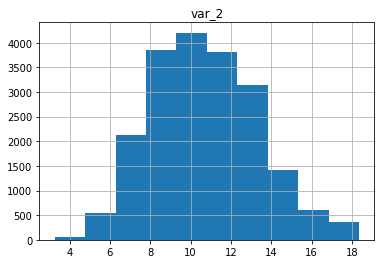


 var_3 



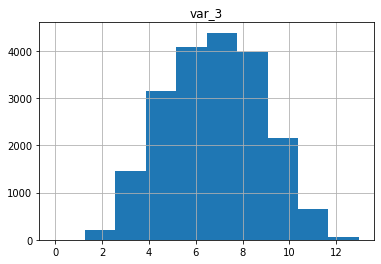


 var_4 



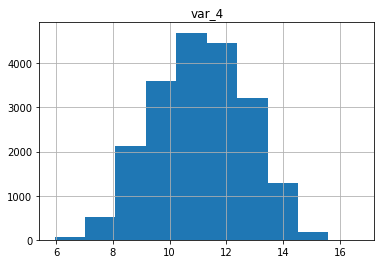


 var_5 



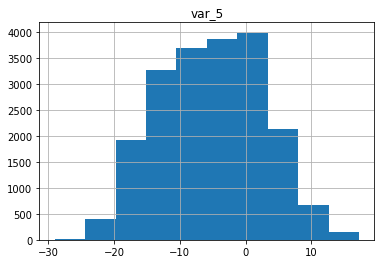


 var_6 



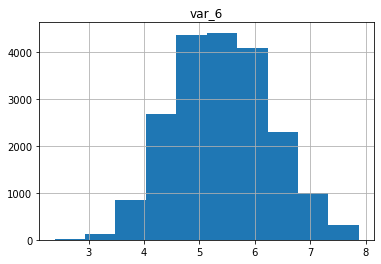


 var_7 



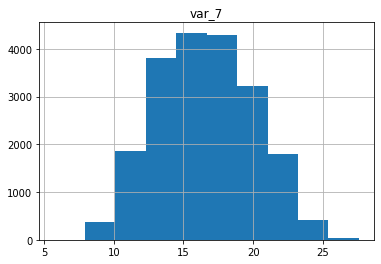


 var_8 



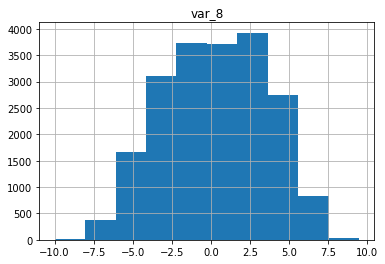


 var_9 



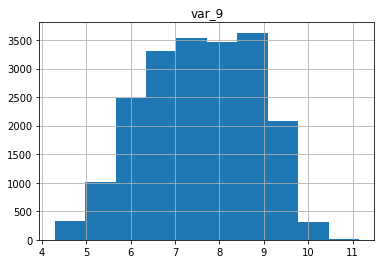


 var_10 



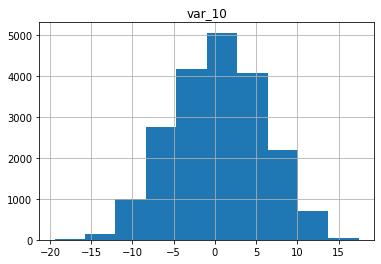


 var_11 



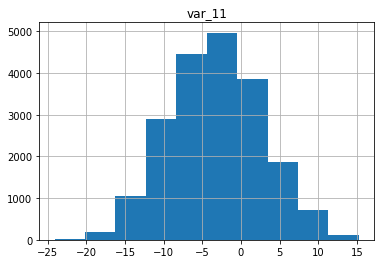


 var_12 



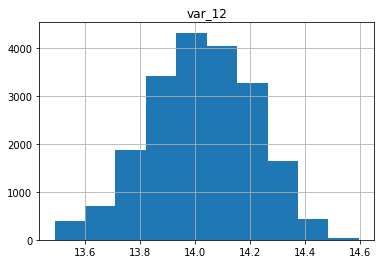


 var_13 



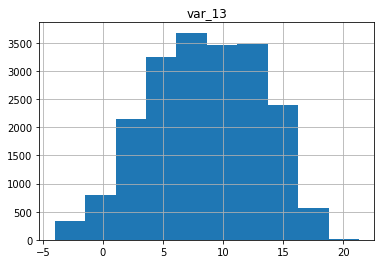


 var_14 



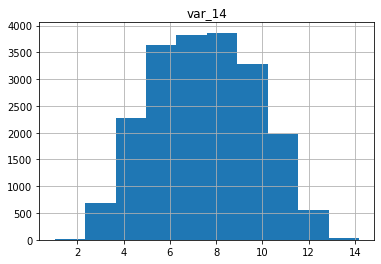


 var_15 



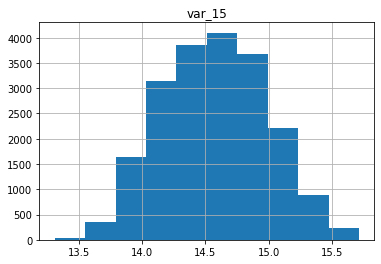


 var_16 



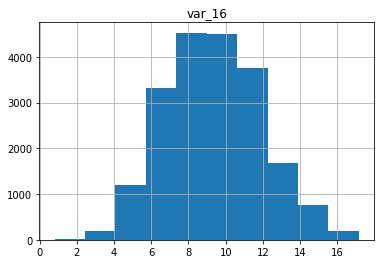


 var_17 



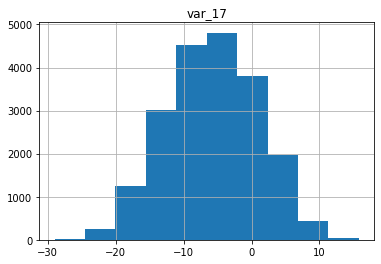


 var_18 



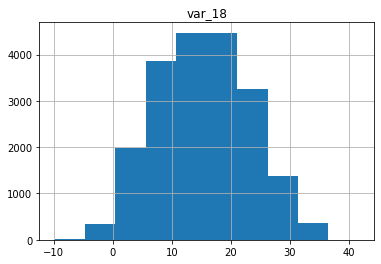


 var_19 



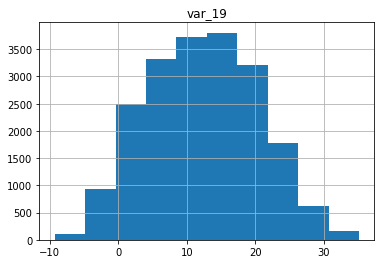


 var_20 



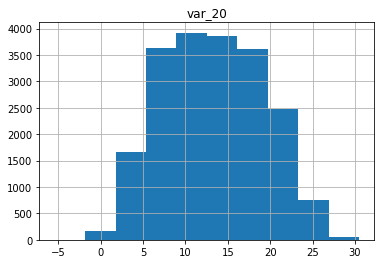


 var_21 



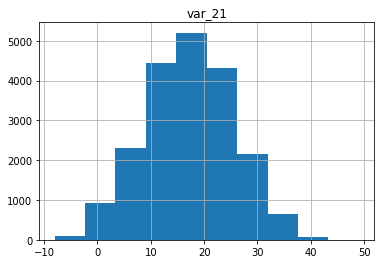


 var_22 



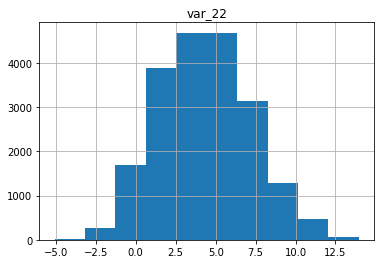


 var_23 



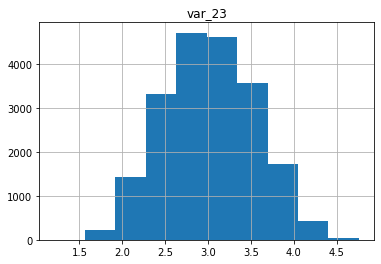


 var_24 



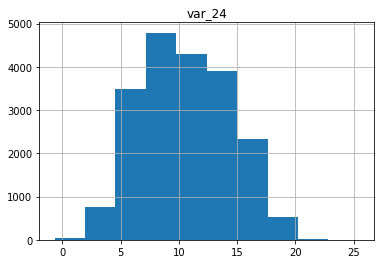


 var_25 



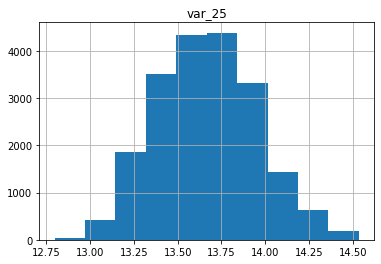


 var_26 



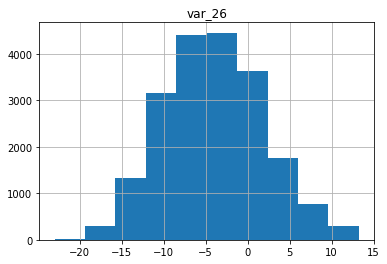


 var_27 



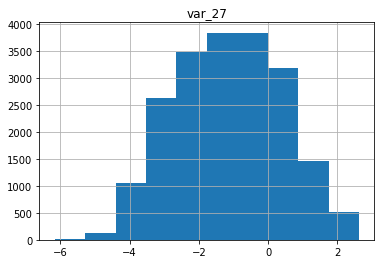


 var_28 



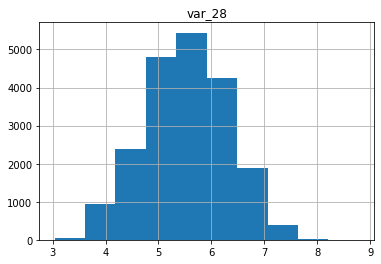


 var_29 



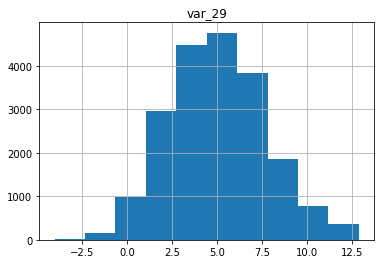


 var_30 



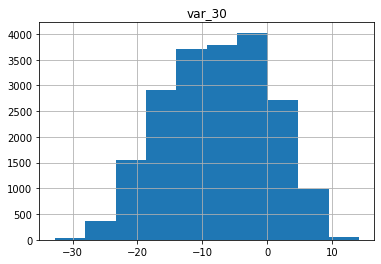


 var_31 



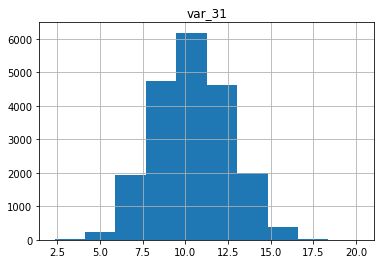


 var_32 



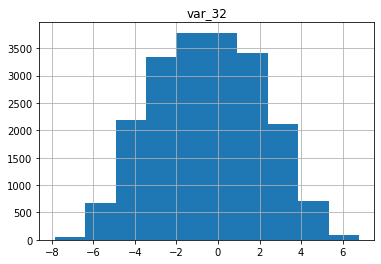


 var_33 



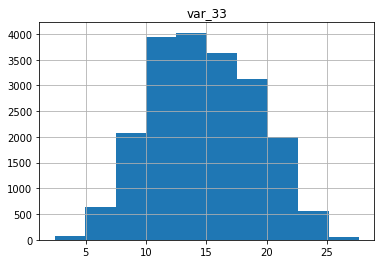


 var_34 



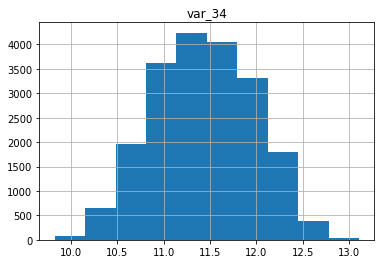


 var_35 



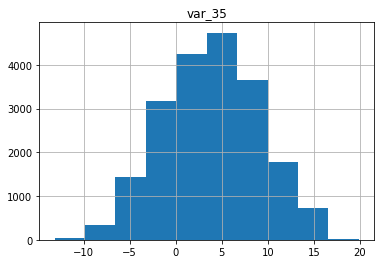


 var_36 



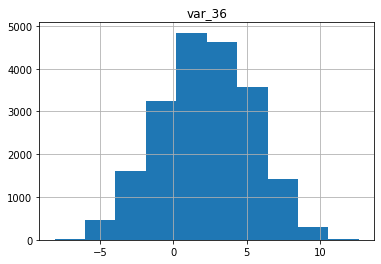


 var_37 



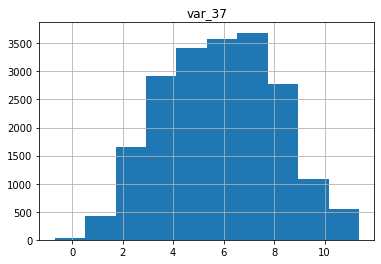


 var_38 



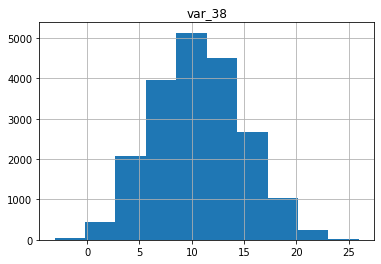


 var_39 



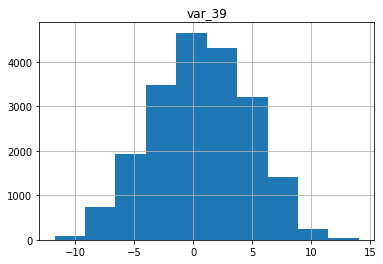


 var_40 



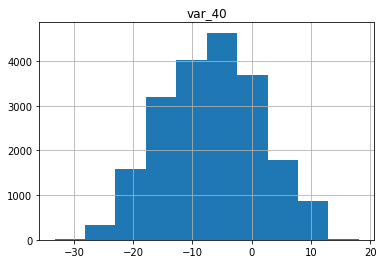


 var_41 



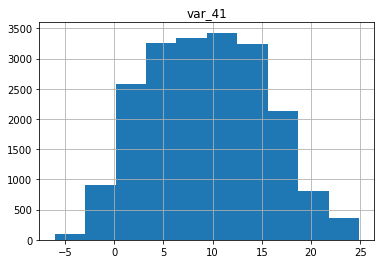


 var_42 



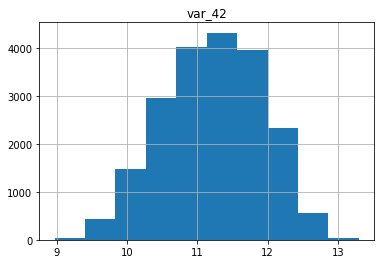


 var_43 



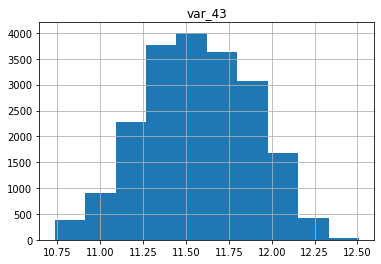


 var_44 



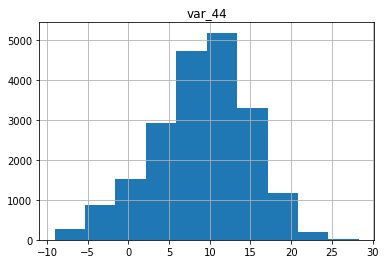


 var_45 



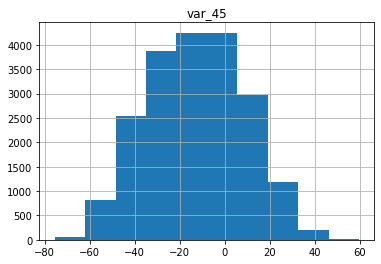


 var_46 



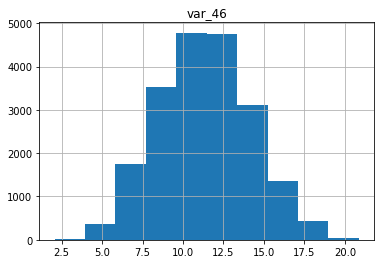


 var_47 



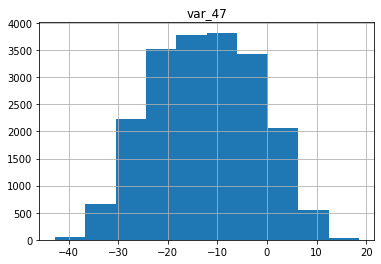


 var_48 



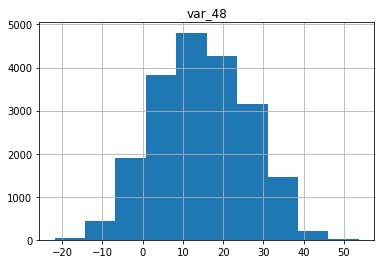


 var_49 



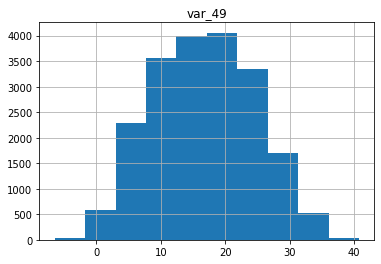


 var_50 



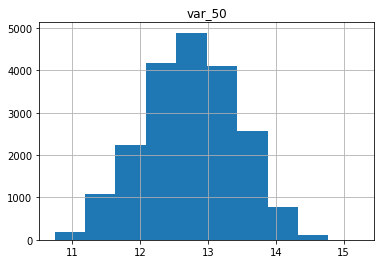


 var_51 



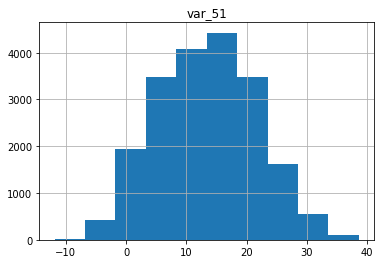


 var_52 



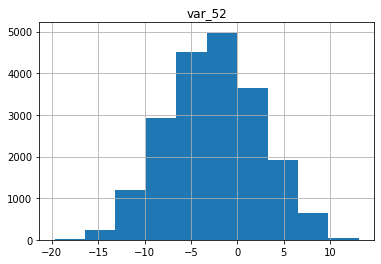


 var_53 



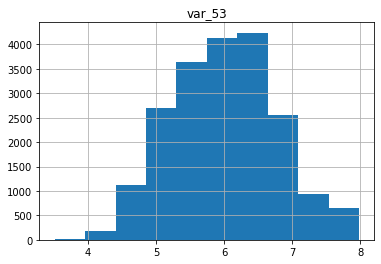


 var_54 



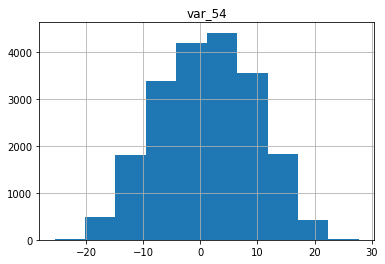


 var_55 



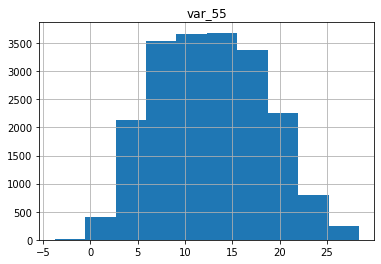


 var_56 



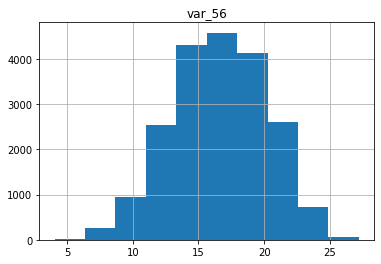


 var_57 



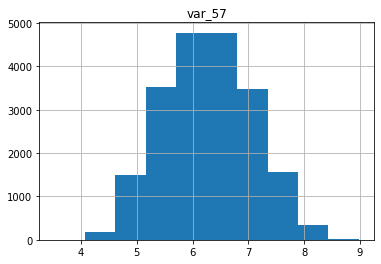


 var_58 



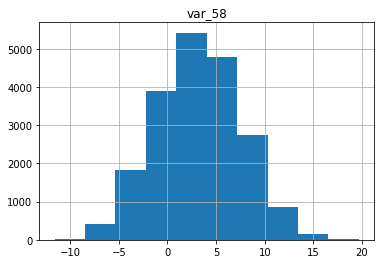


 var_59 



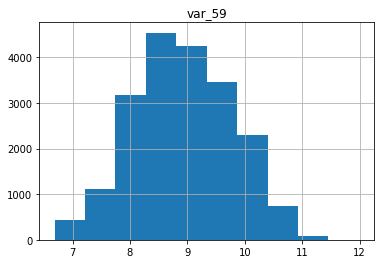


 var_60 



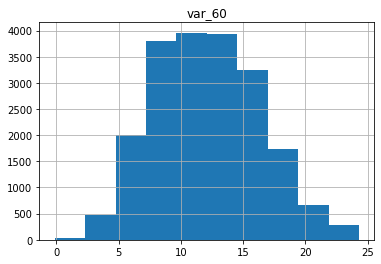


 var_61 



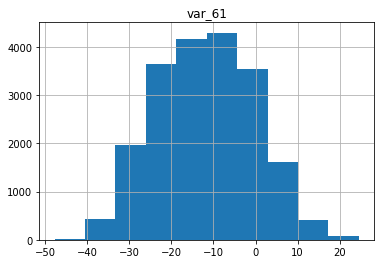


 var_62 



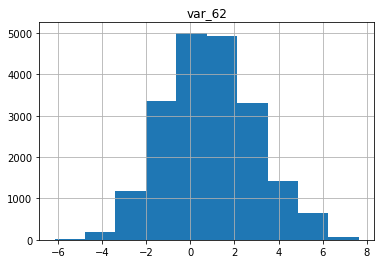


 var_63 



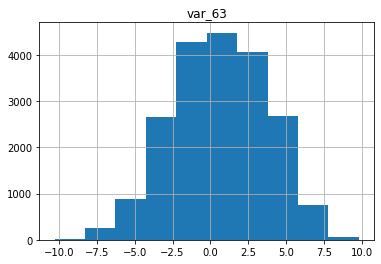


 var_64 



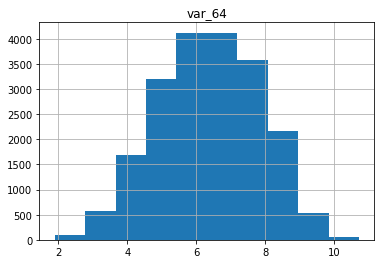


 var_65 



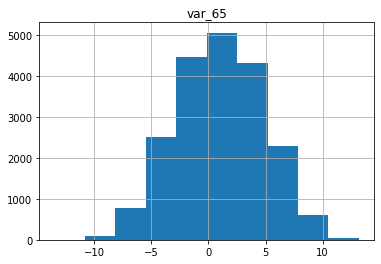


 var_66 



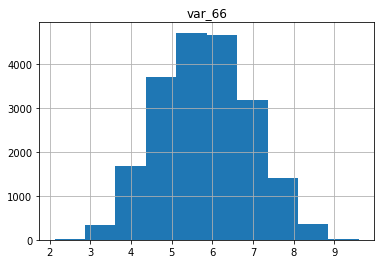


 var_67 



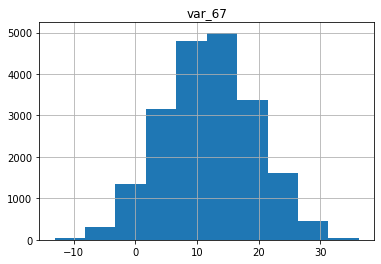


 var_68 



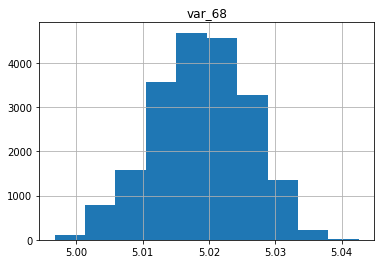


 var_69 



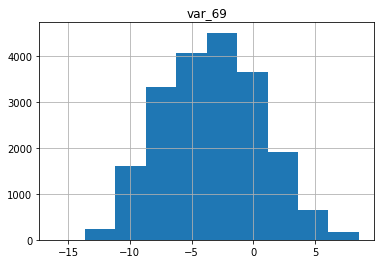


 var_70 



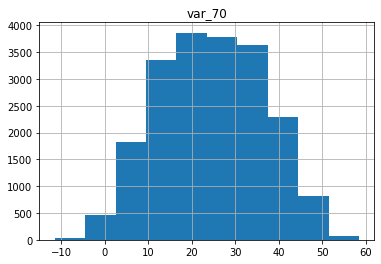


 var_71 



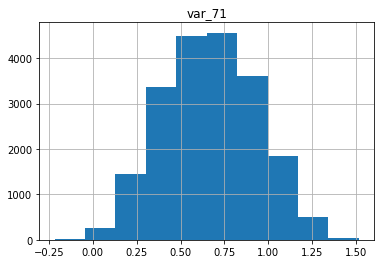


 var_72 



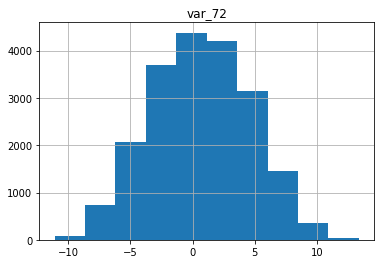


 var_73 



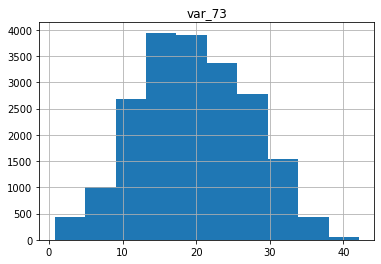


 var_74 



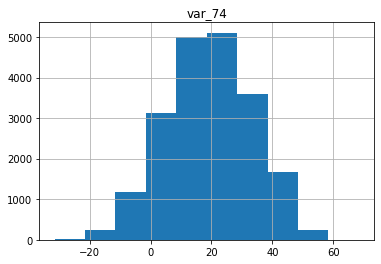


 var_75 



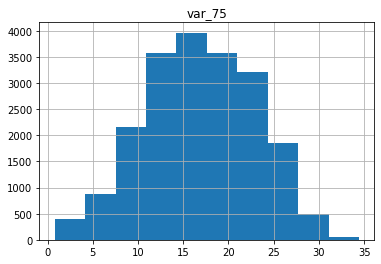


 var_76 



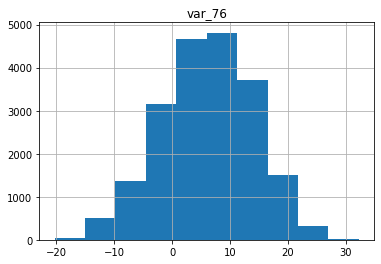


 var_77 



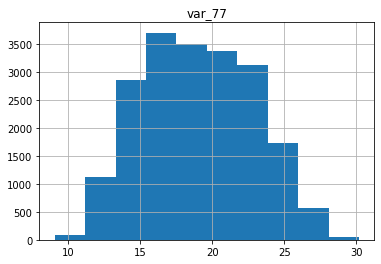


 var_78 



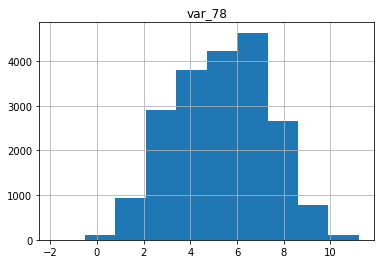


 var_79 



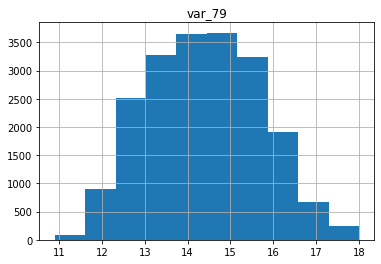


 var_80 



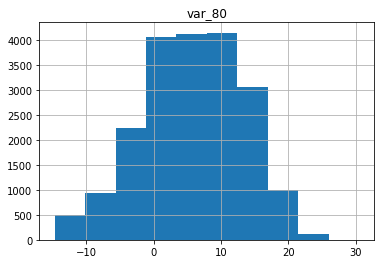


 var_81 



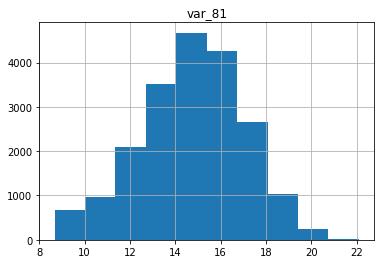


 var_82 



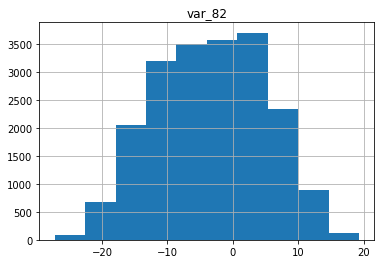


 var_83 



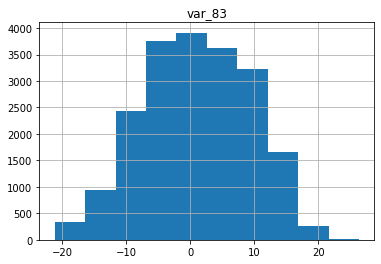


 var_84 



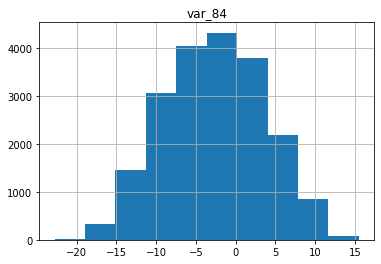


 var_85 



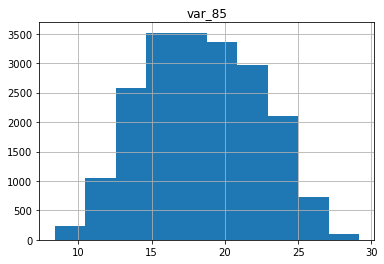


 var_86 



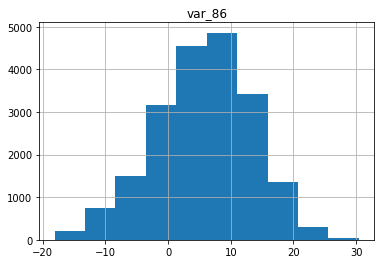


 var_87 



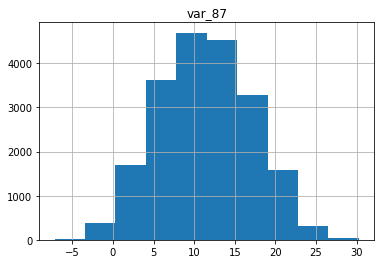


 var_88 



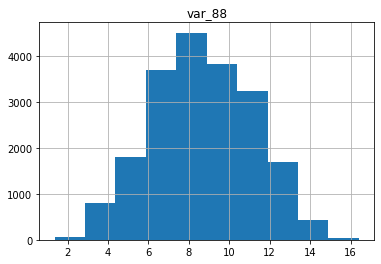


 var_89 



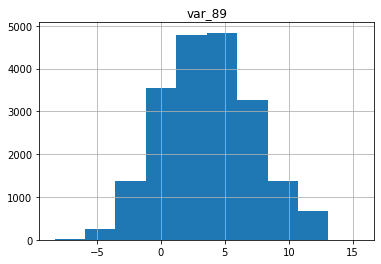


 var_90 



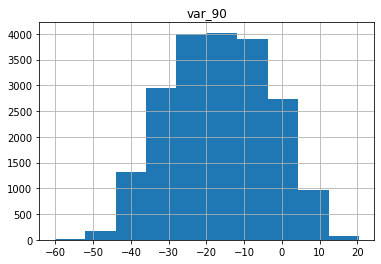


 var_91 



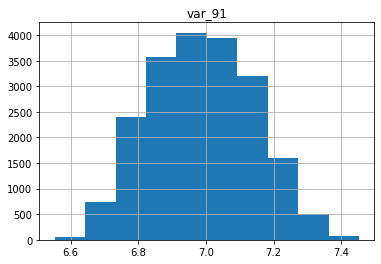


 var_92 



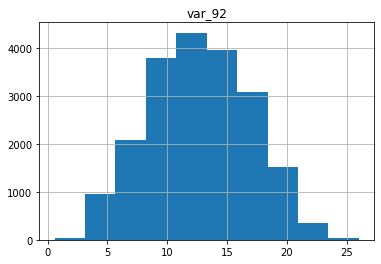


 var_93 



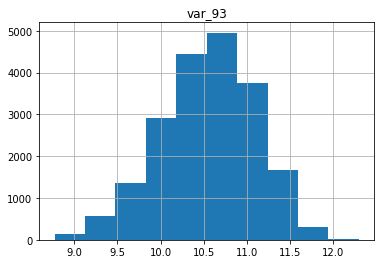


 var_94 



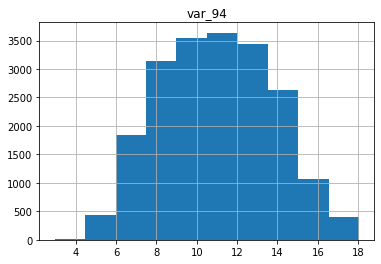


 var_95 



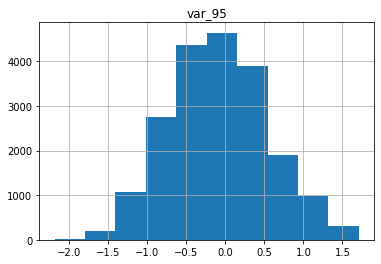


 var_96 



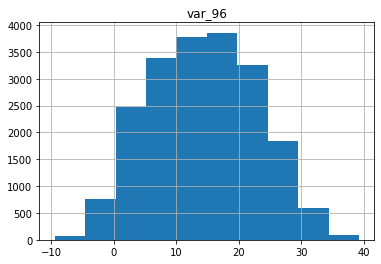


 var_97 



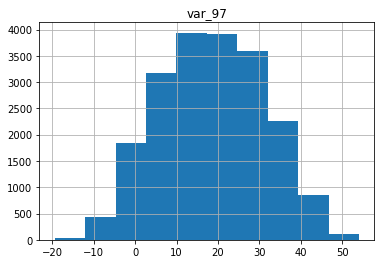


 var_98 



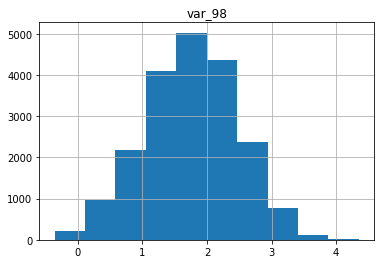


 var_99 



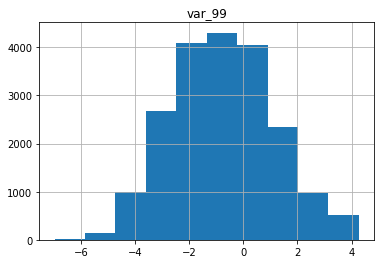


 var_100 



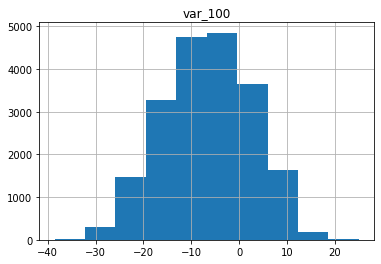


 var_101 



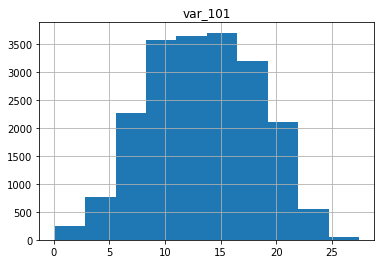


 var_102 



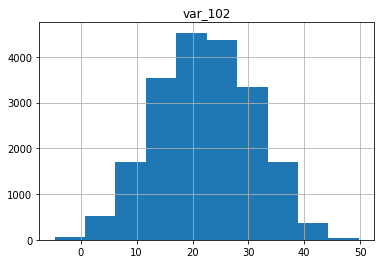


 var_103 



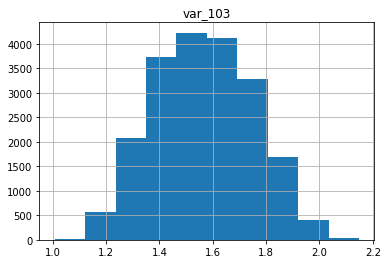


 var_104 



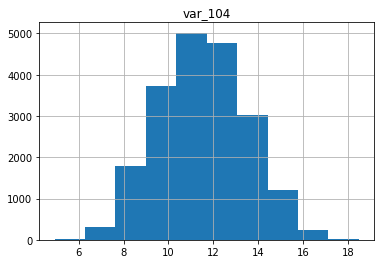


 var_105 



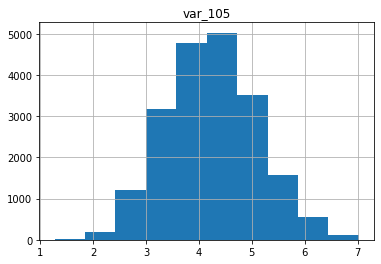


 var_106 



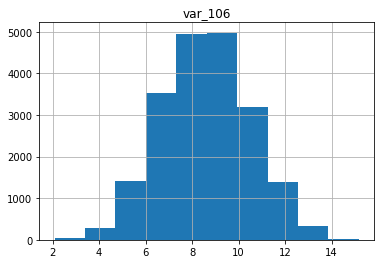


 var_107 



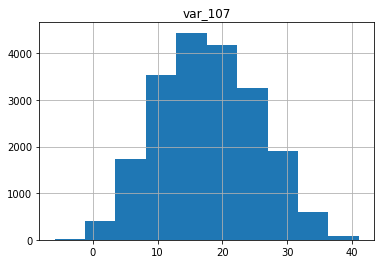


 var_108 



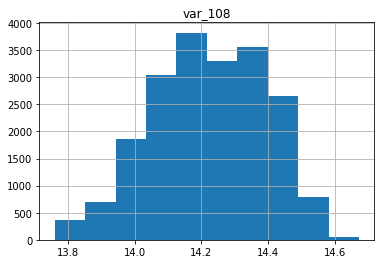


 var_109 



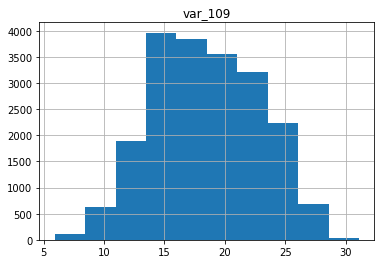


 var_110 



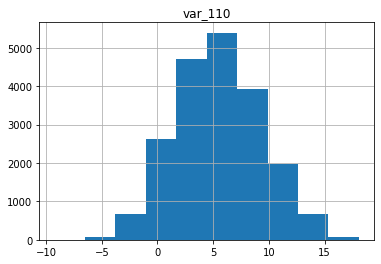


 var_111 



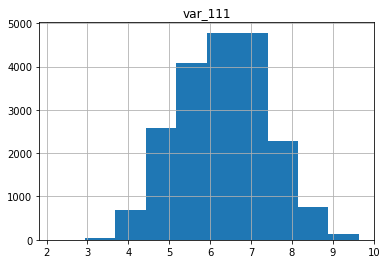


 var_112 



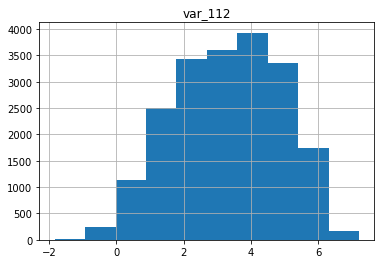


 var_113 



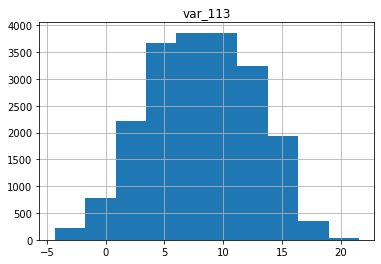


 var_114 



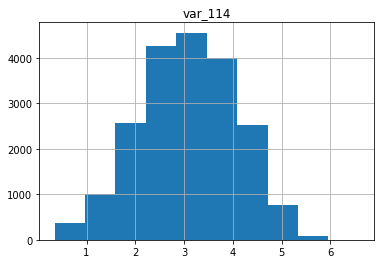


 var_115 



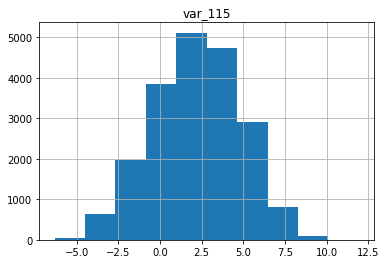


 var_116 



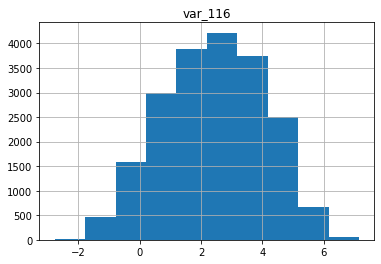


 var_117 



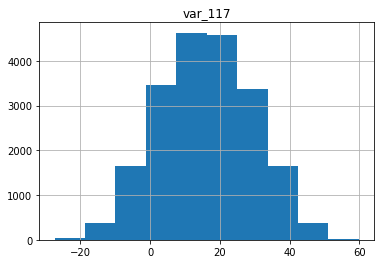


 var_118 



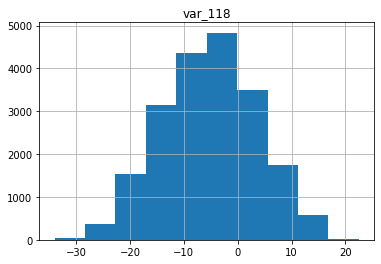


 var_119 



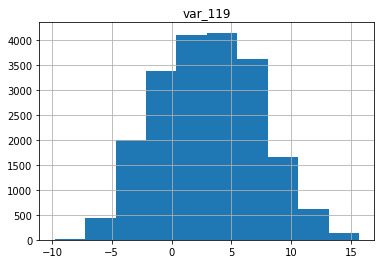


 var_120 



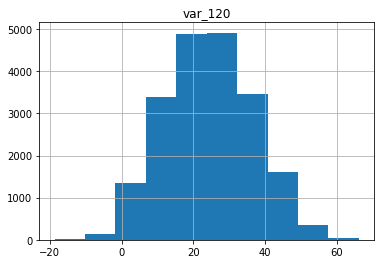


 var_121 



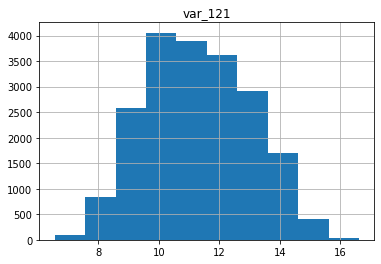


 var_122 



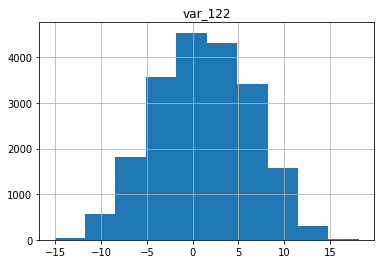


 var_123 



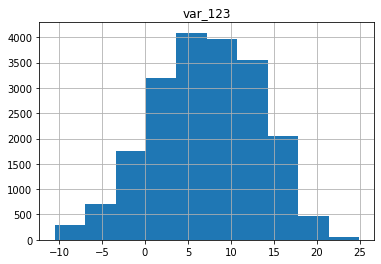


 var_124 



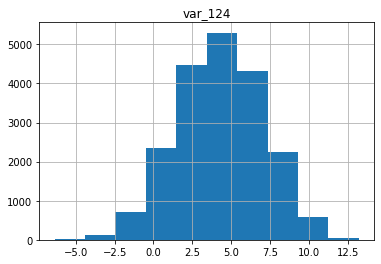


 var_125 



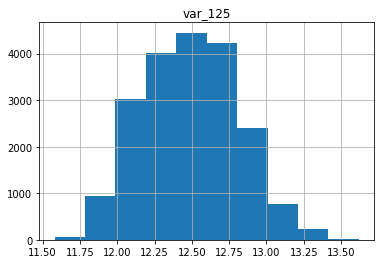


 var_126 



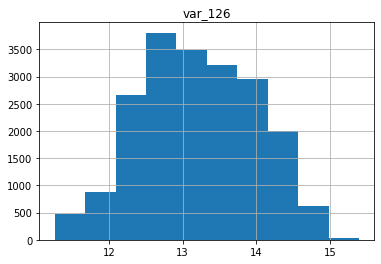


 var_127 



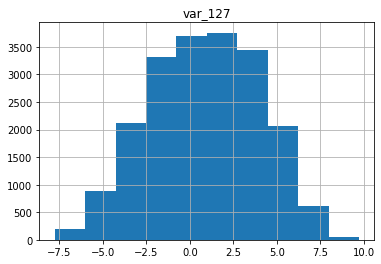


 var_128 



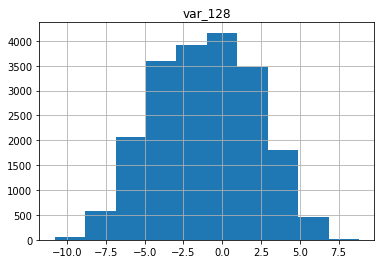


 var_129 



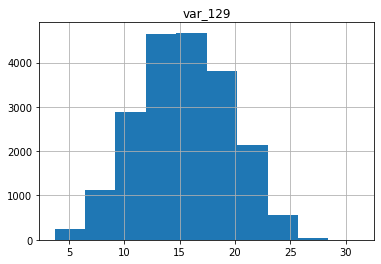


 var_130 



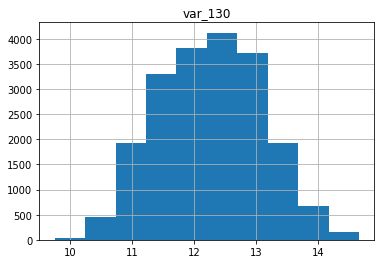


 var_131 



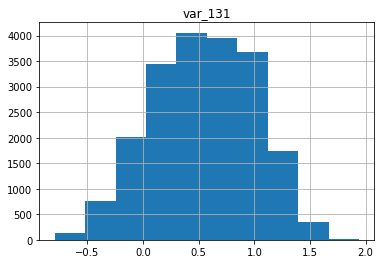


 var_132 



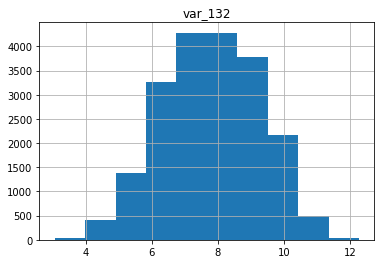


 var_133 



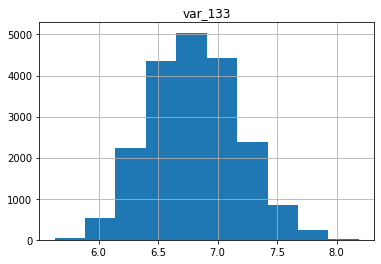


 var_134 



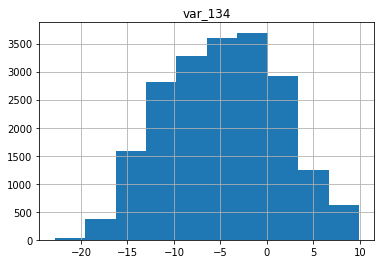


 var_135 



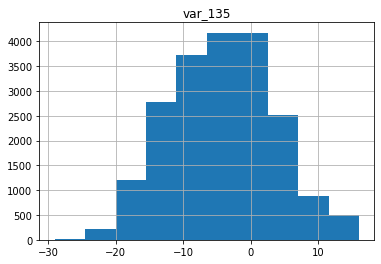


 var_136 



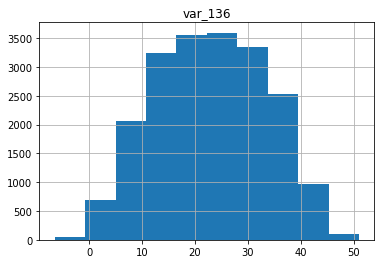


 var_137 



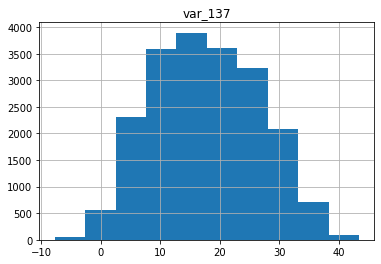


 var_138 



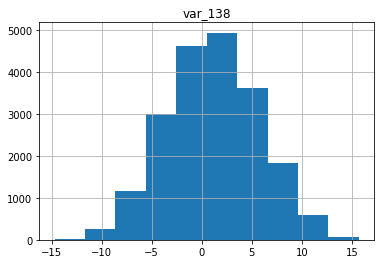


 var_139 



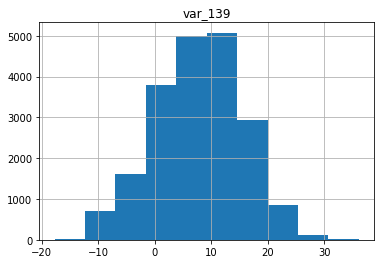


 var_140 



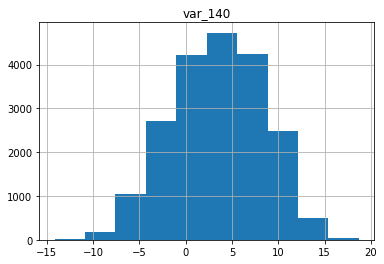


 var_141 



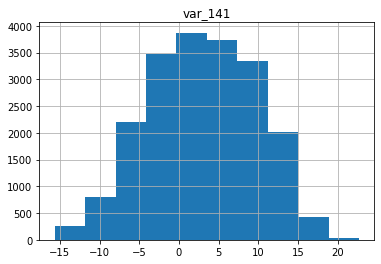


 var_142 



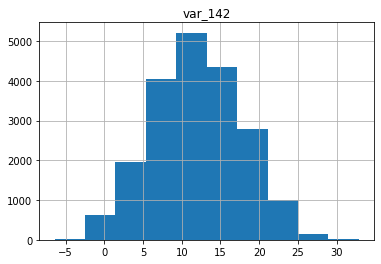


 var_143 



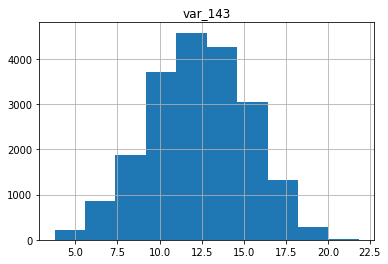


 var_144 



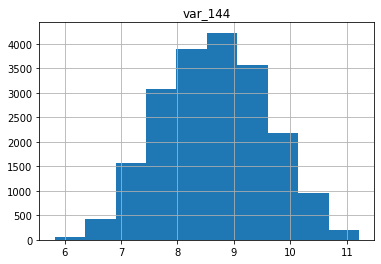


 var_145 



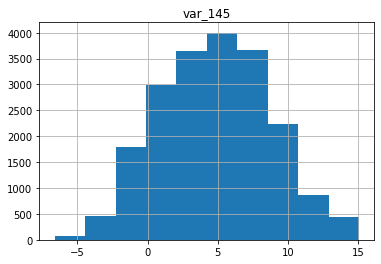


 var_146 



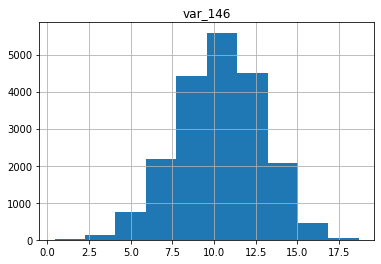


 var_147 



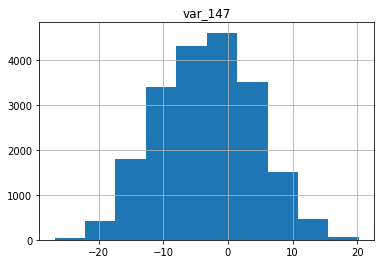


 var_148 



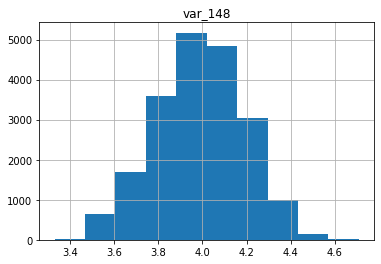


 var_149 



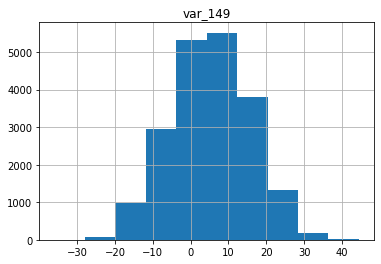


 var_150 



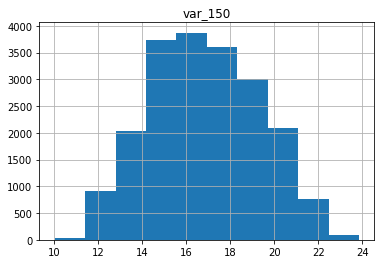


 var_151 



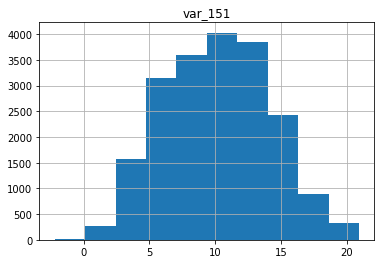


 var_152 



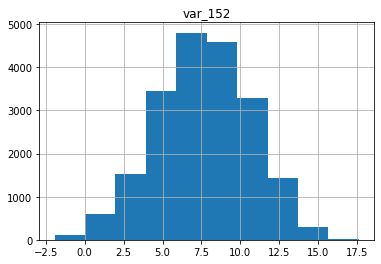


 var_153 



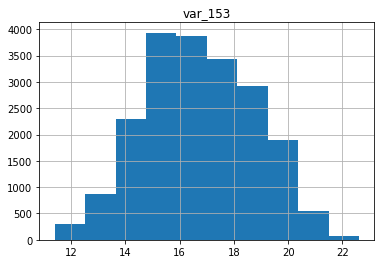


 var_154 



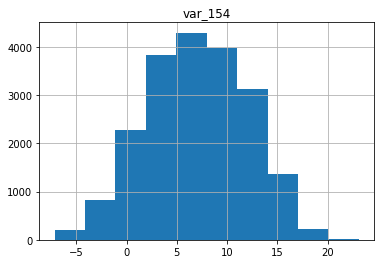


 var_155 



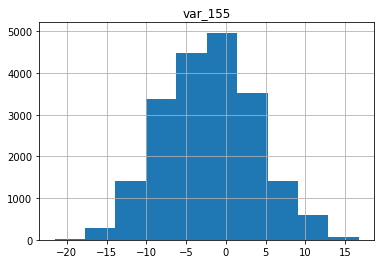


 var_156 



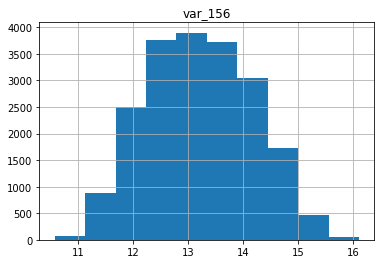


 var_157 



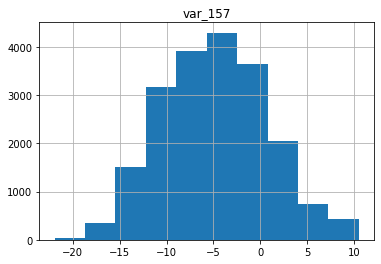


 var_158 



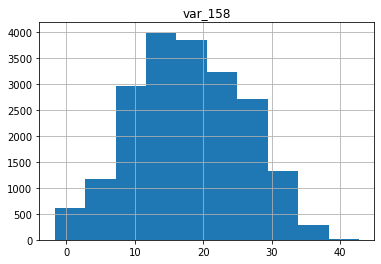


 var_159 



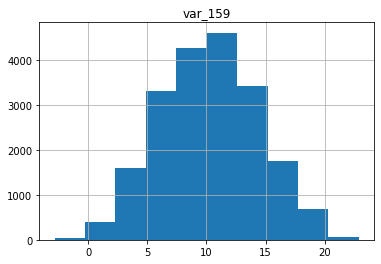


 var_160 



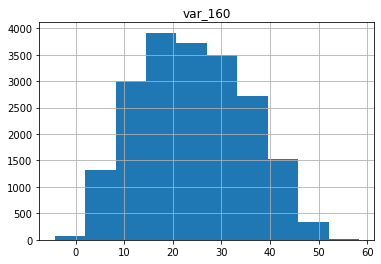


 var_161 



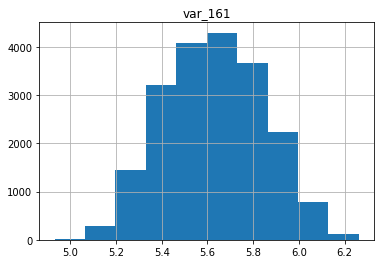


 var_162 



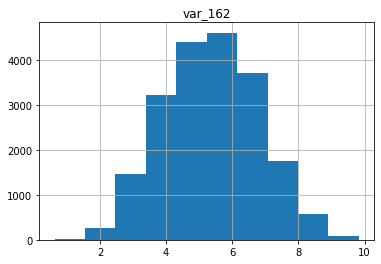


 var_163 



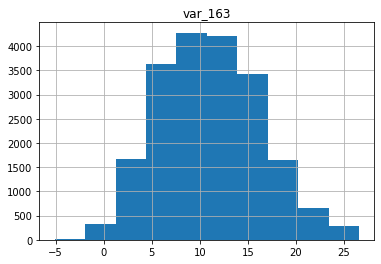


 var_164 



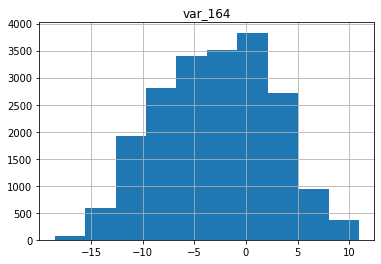


 var_165 



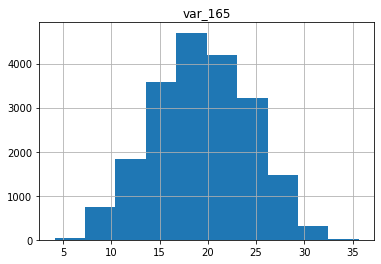


 var_166 



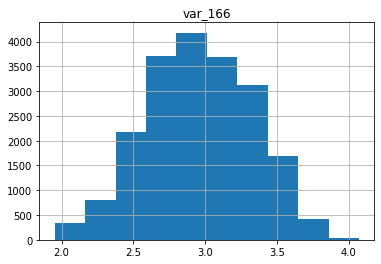


 var_167 



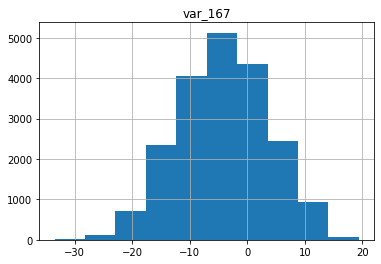


 var_168 



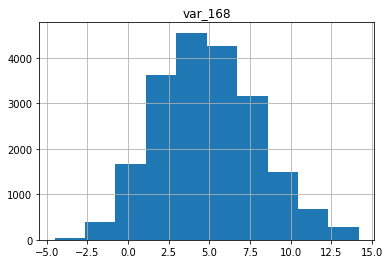


 var_169 



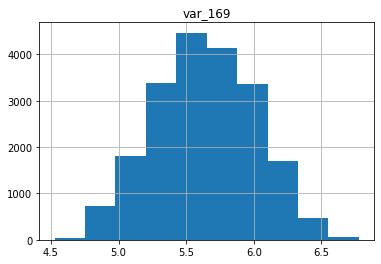


 var_170 



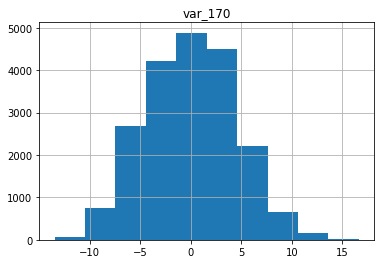


 var_171 



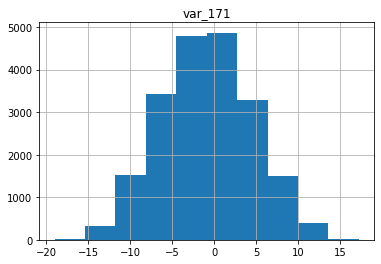


 var_172 



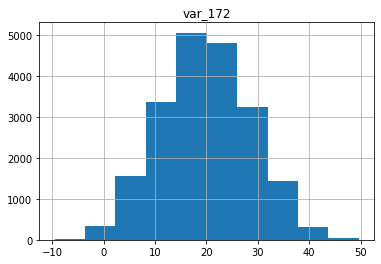


 var_173 



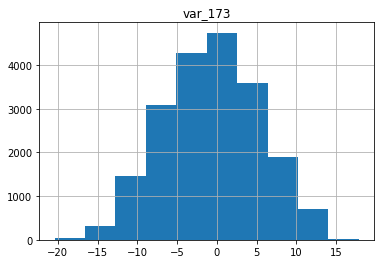


 var_174 



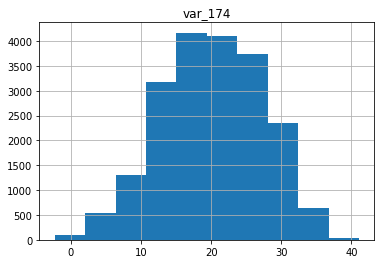


 var_175 



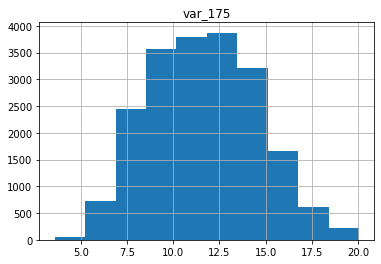


 var_176 



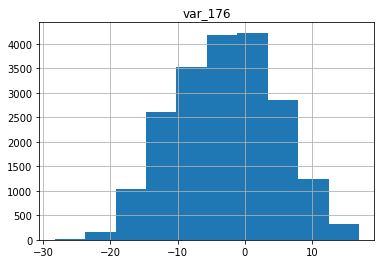


 var_177 



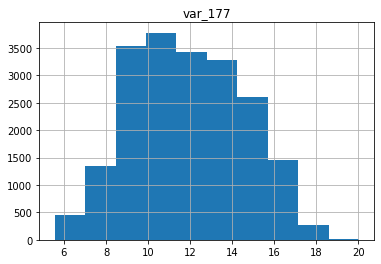


 var_178 



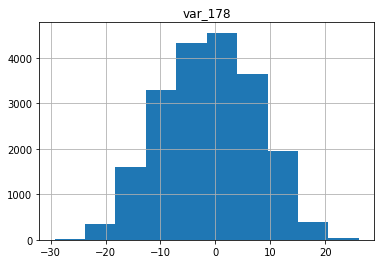


 var_179 



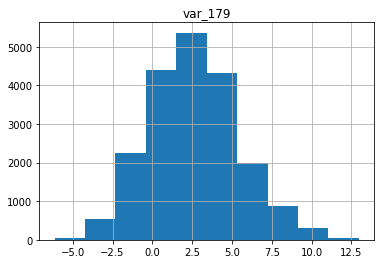


 var_180 



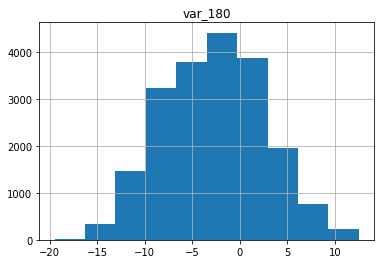


 var_181 



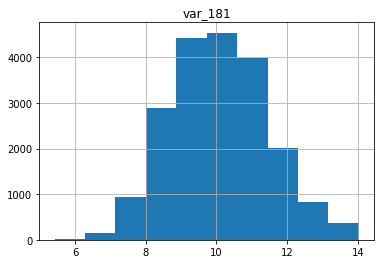


 var_182 



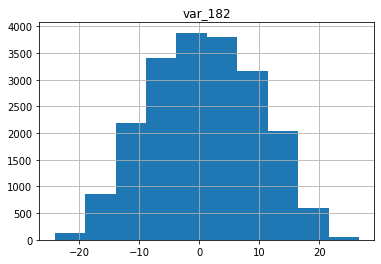


 var_183 



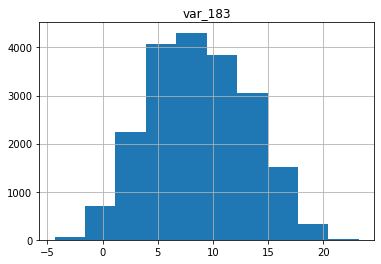


 var_184 



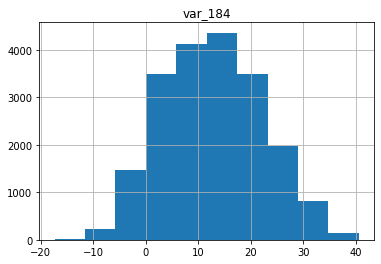


 var_185 



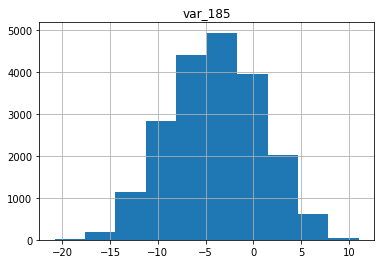


 var_186 



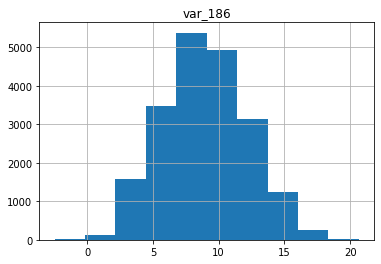


 var_187 



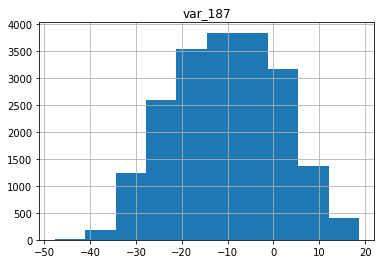


 var_188 



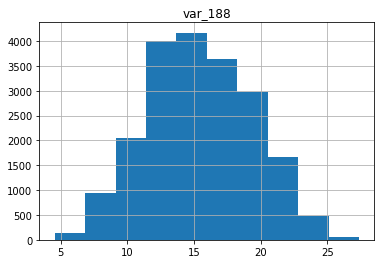


 var_189 



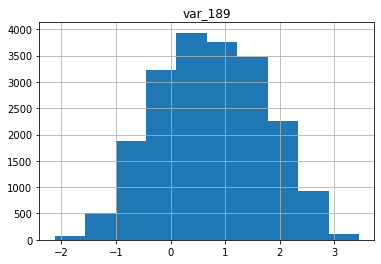


 var_190 



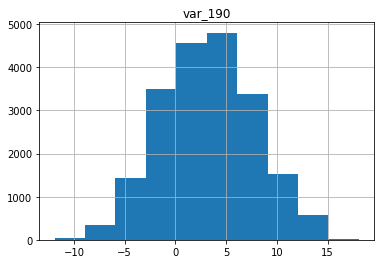


 var_191 



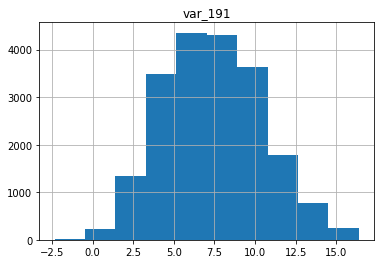


 var_192 



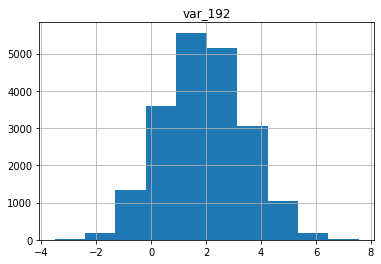


 var_193 



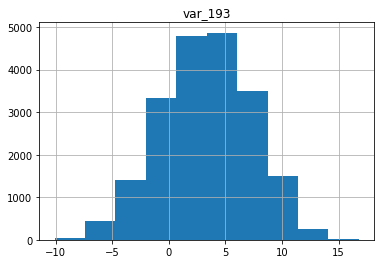


 var_194 



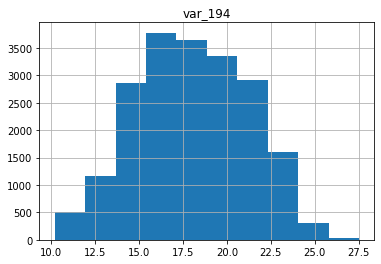


 var_195 



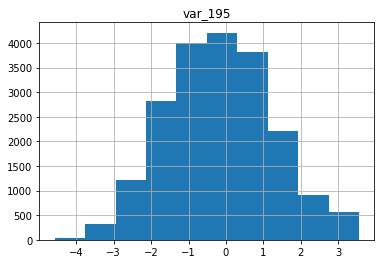


 var_196 



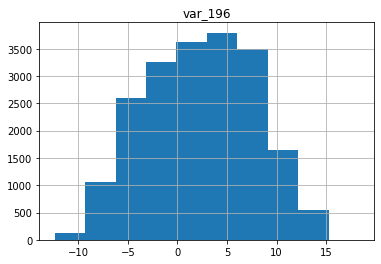


 var_197 



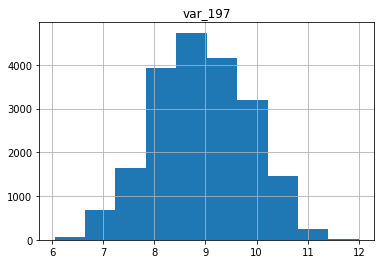


 var_198 



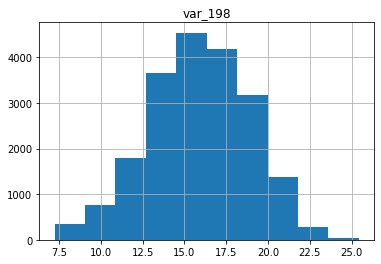


 var_199 



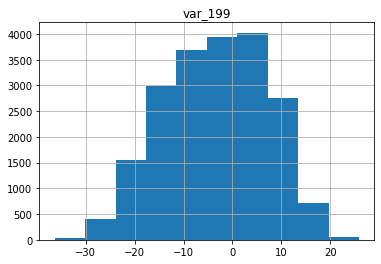

In [7]:
# show histograms of data columns
for col in num_columns:
  print("\n", col, "\n")
  ser = app_train[col]
  ser.describe()
  app_train.hist(col)
  plt.show();

all the cols seem to have a normal distribution, with no outliers - good!

In [9]:
# Load test data
app_test = pd.read_csv('test.csv')
print('Test data shape: ', app_test.shape)
print('\n\nHead\n', app_test.head())
print('\n\ndtypes\n', app_test.dtypes)
print('\n\ndtype value counts\n', app_test.dtypes.value_counts())
print('\n\nDescribe\n')
app_test.describe()

# Number of each type of column
app_test.dtypes.value_counts()

# Missing values statistics
missing_values = missing_values_table(app_test)
missing_values.head(100)

Test data shape:  (26445, 201)


Head
   ID_code    var_0    var_1    var_2  ...  var_196  var_197  var_198  var_199
0  test_0  11.0656   7.7798  12.9536  ...   4.3654  10.7200  15.4722  -8.7197
1  test_1   8.5304   1.2543  11.3047  ...  -1.4852   9.8714  19.1293 -20.9760
2  test_2   5.4827 -10.3581  10.1407  ...  -7.1086   7.0618  19.8956 -23.1794
3  test_3   8.5374  -1.3222  12.0220  ...   3.9567   9.2295  13.0168  -4.2108
4  test_4  11.7058  -0.1327  14.1295  ...  -5.1612   7.2882  13.9260  -9.1846

[5 rows x 201 columns]


dtypes
 ID_code     object
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object


dtype value counts
 float64    200
object       1
dtype: int64


Describe

Your selected dataframe has 201 columns.
There are 95 columns that have missing values.


Missing Values  % of Total Values
var_105               1                0.0
var_165               1                0.0
var_174               1                0.0
var_173               1                0.0
var_172               1                0.0
...                 ...                ...
var_134               1                0.0
var_133               1                0.0
var_132               1                0.0
var_131               1                0.0
var_199               1                0.0

[95 rows x 2 columns]

no misisng values - great!

num_columns = Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200) 



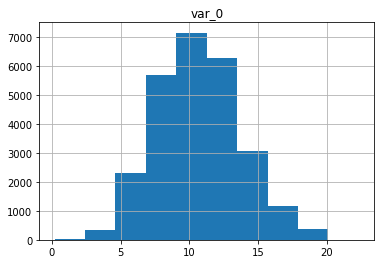

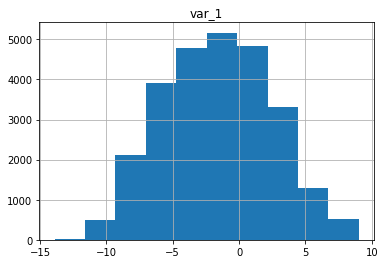

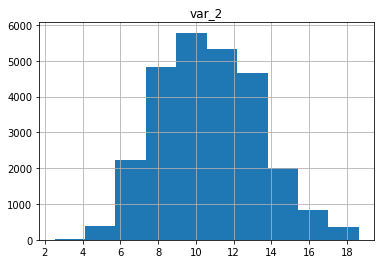

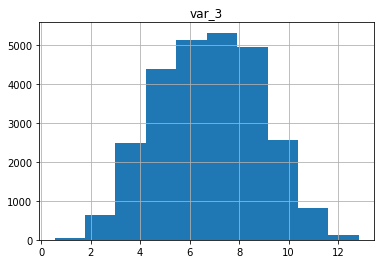

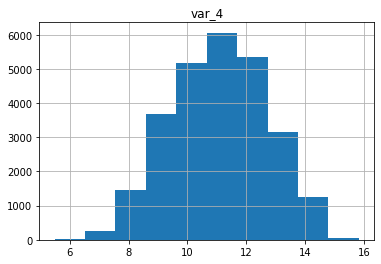

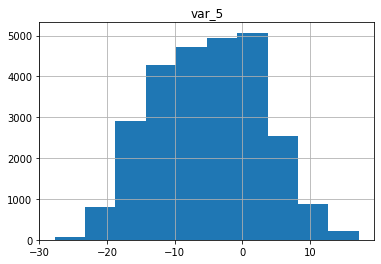

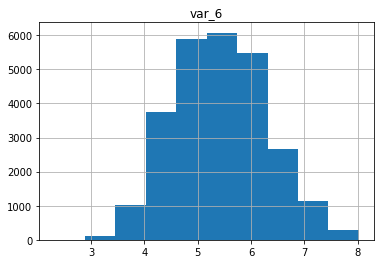

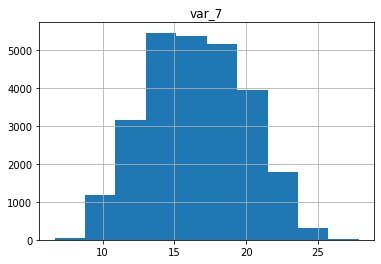

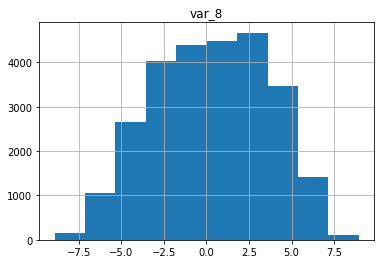

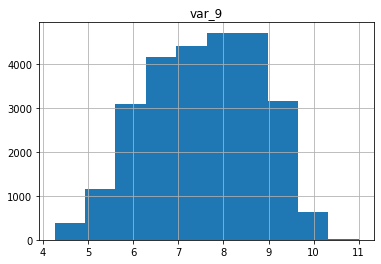

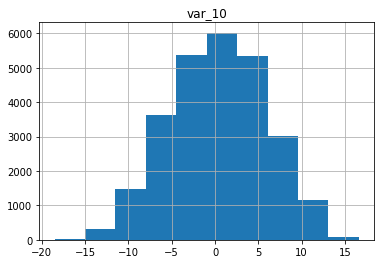

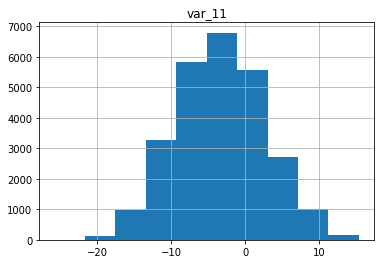

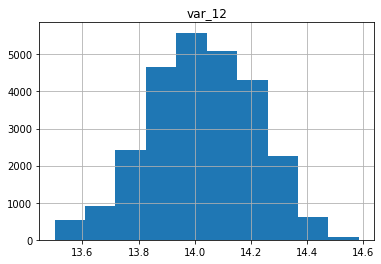

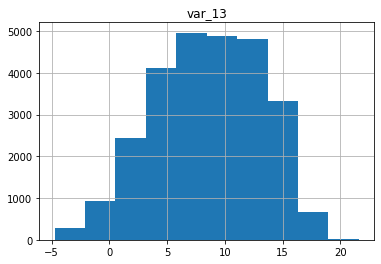

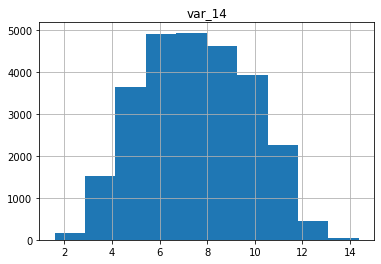

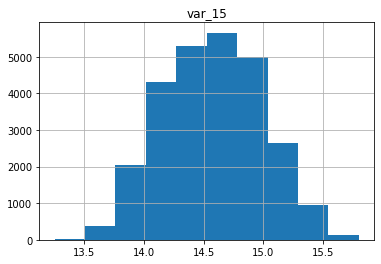

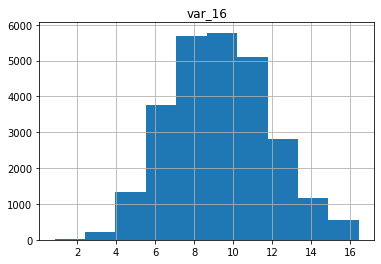

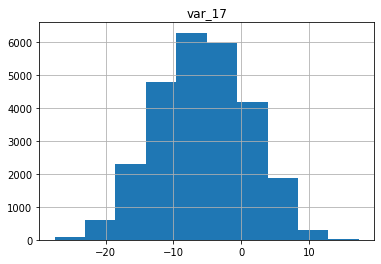

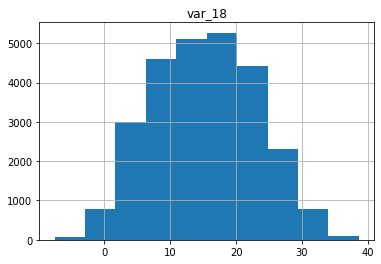

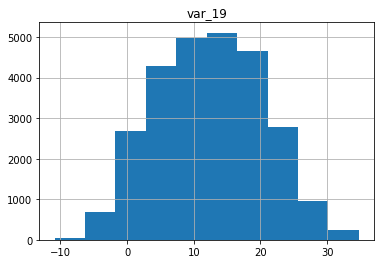

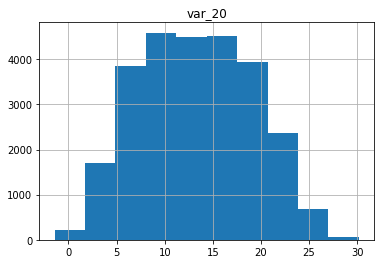

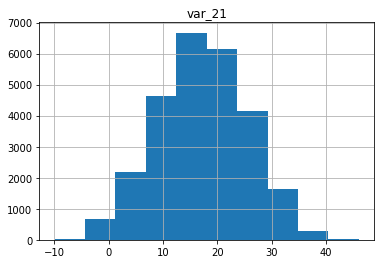

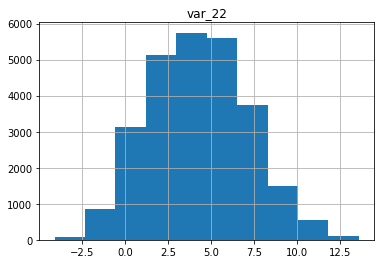

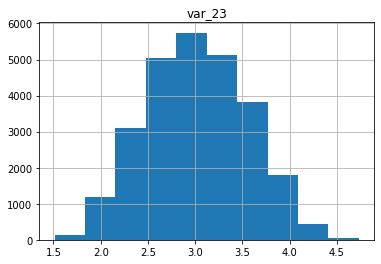

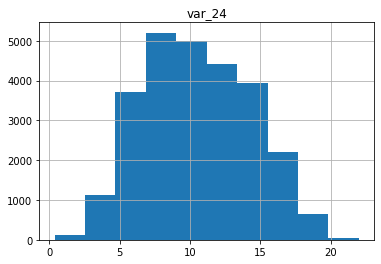

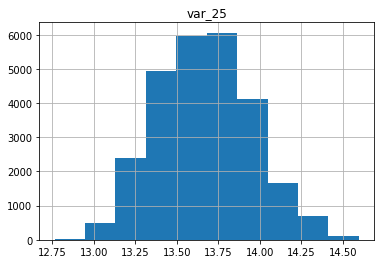

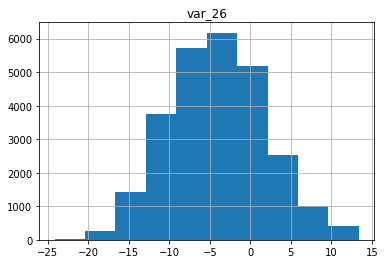

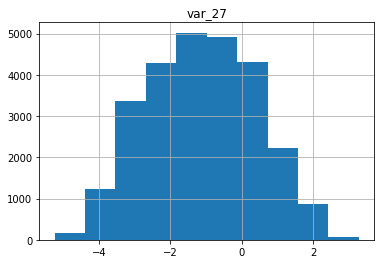

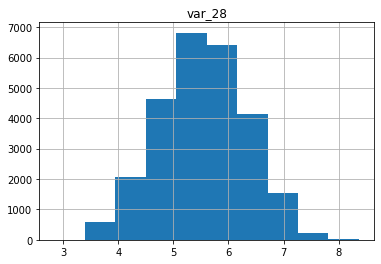

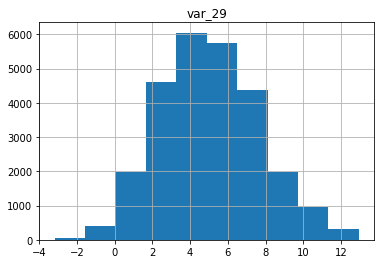

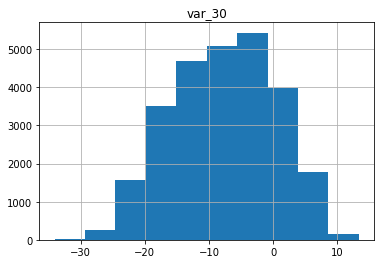

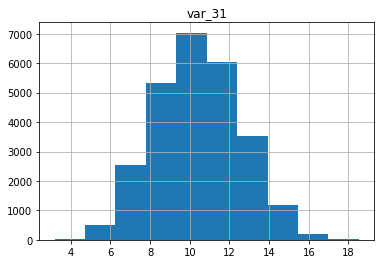

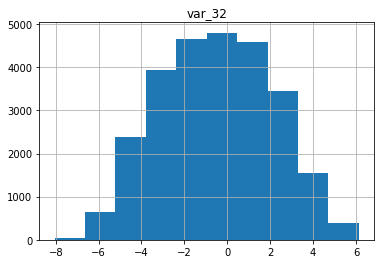

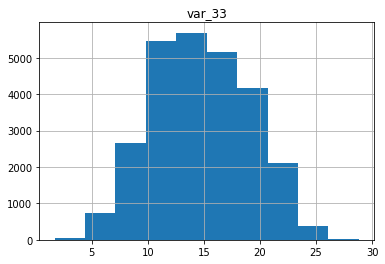

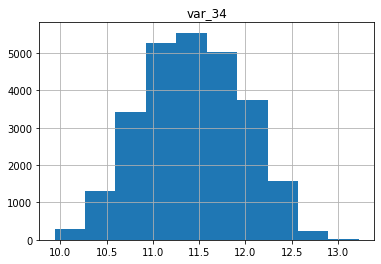

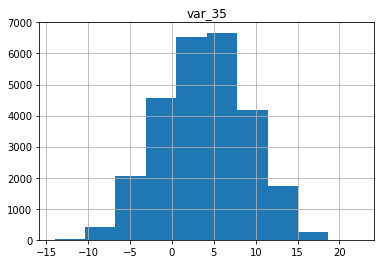

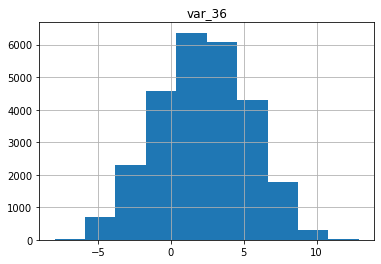

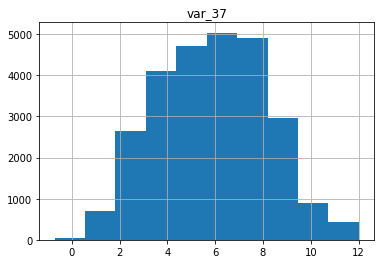

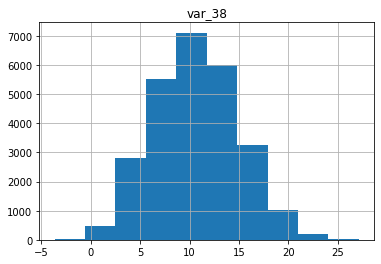

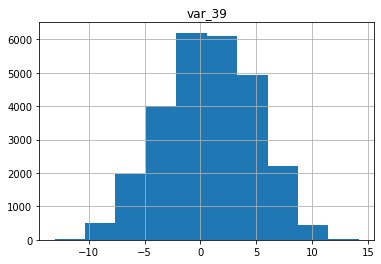

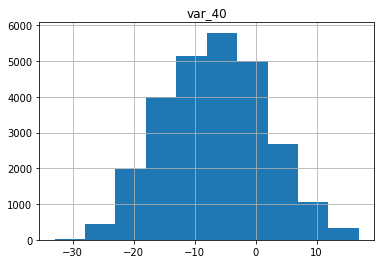

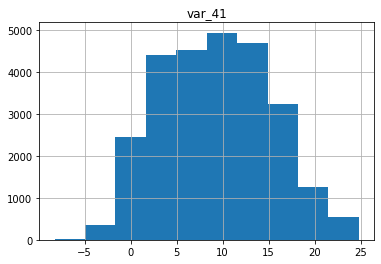

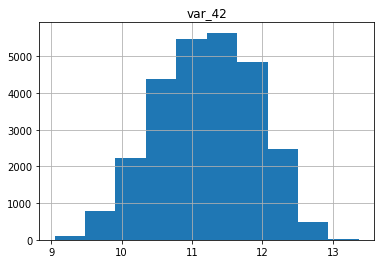

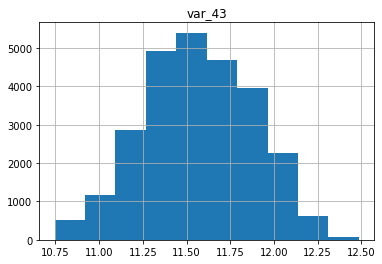

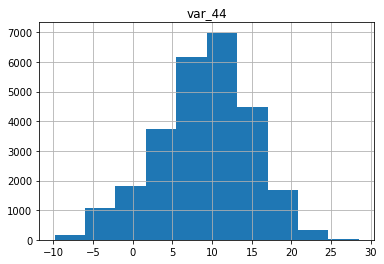

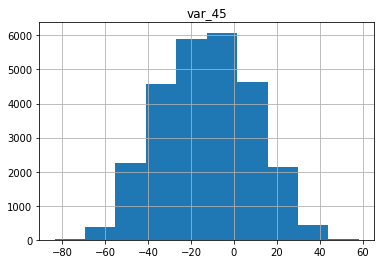

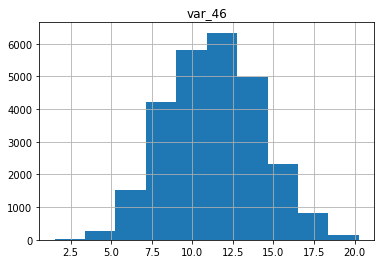

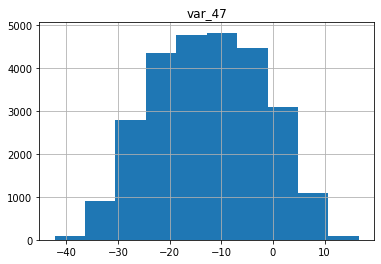

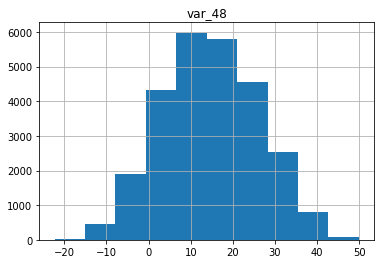

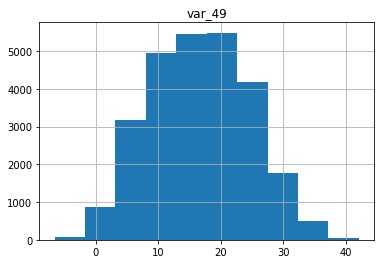

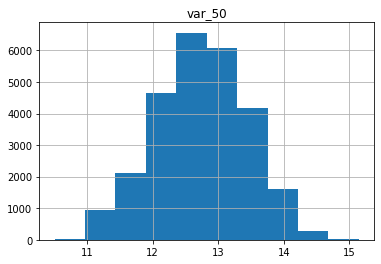

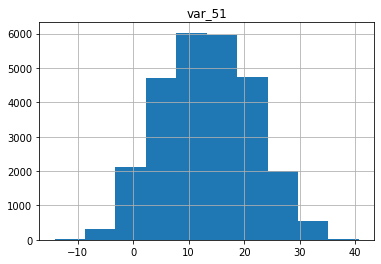

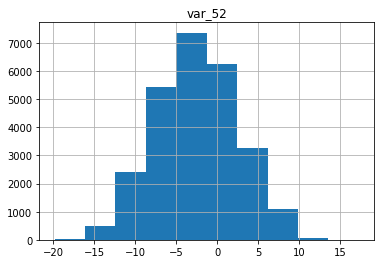

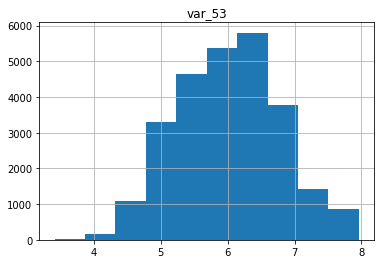

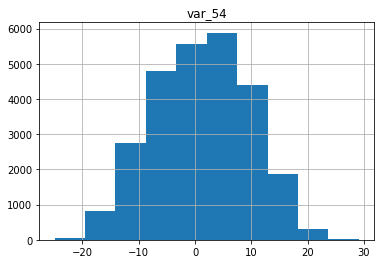

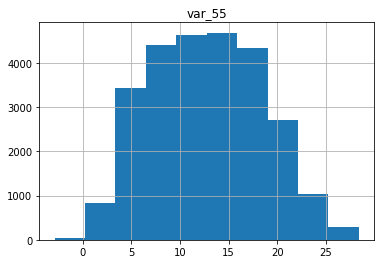

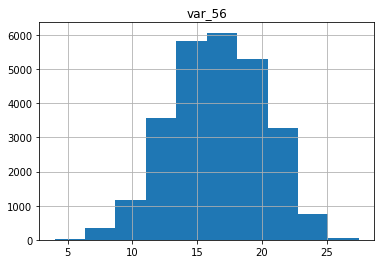

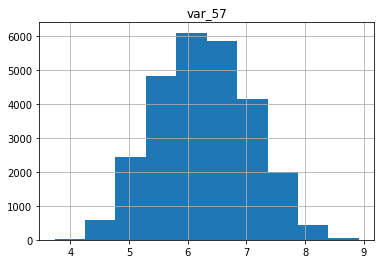

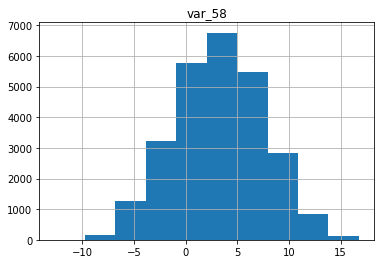

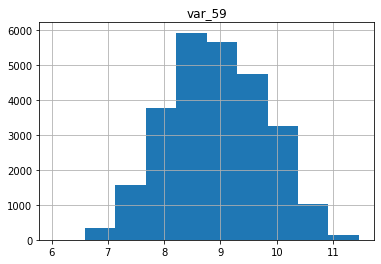

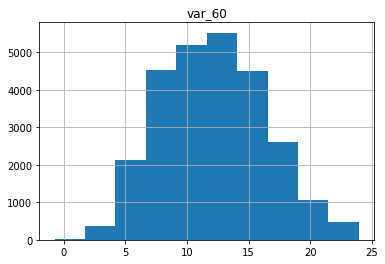

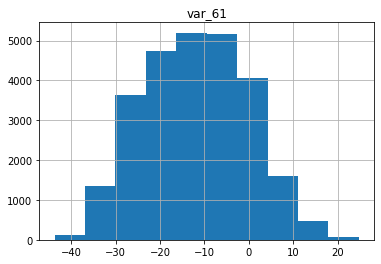

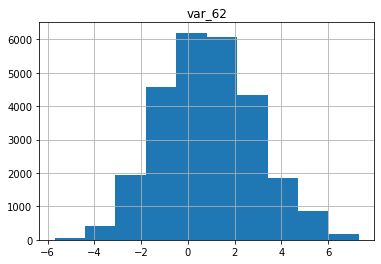

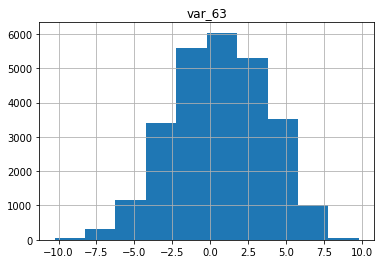

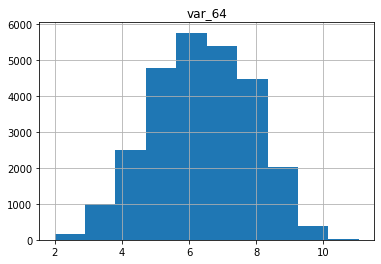

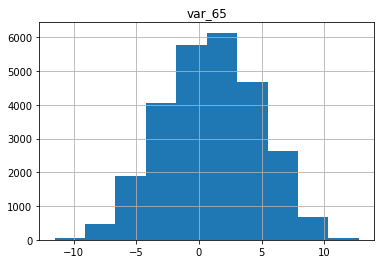

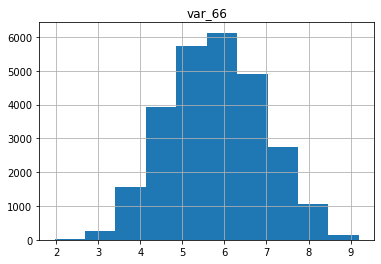

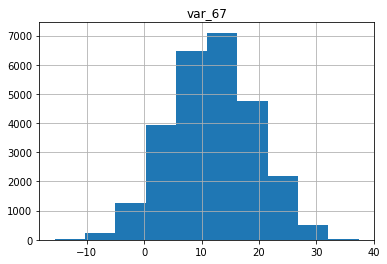

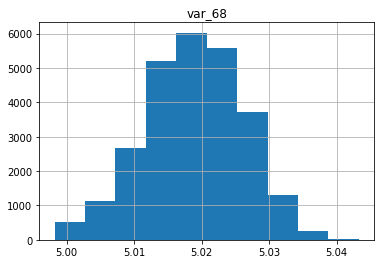

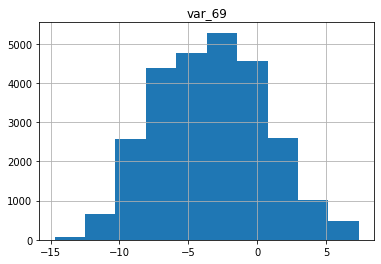

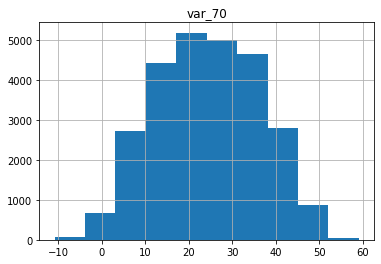

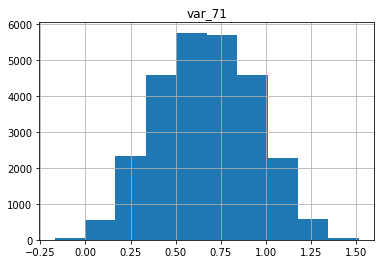

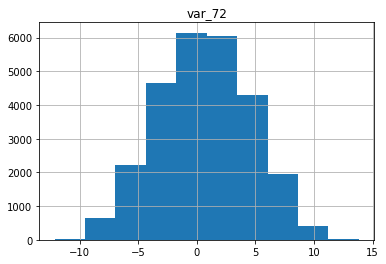

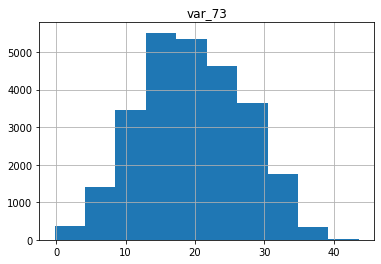

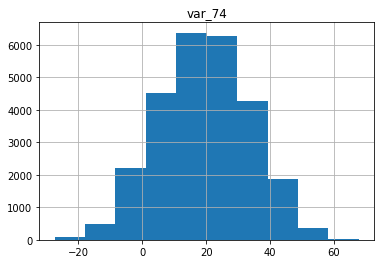

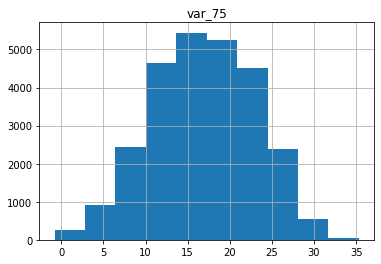

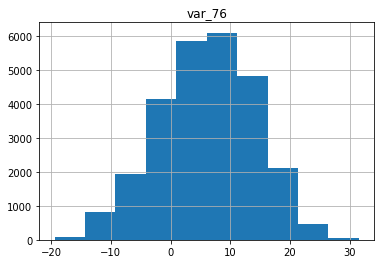

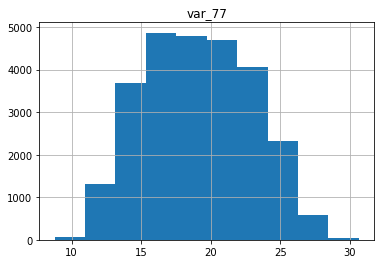

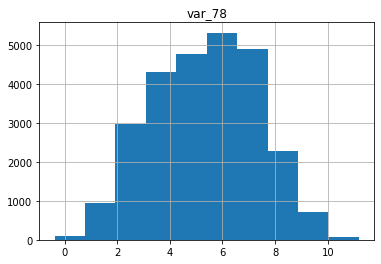

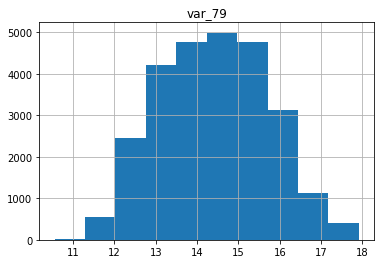

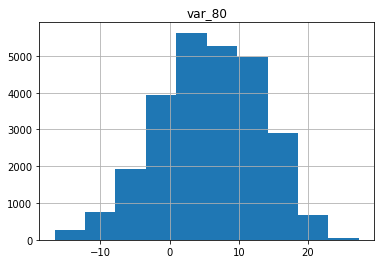

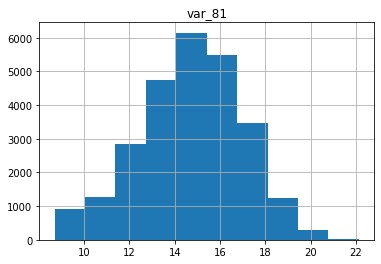

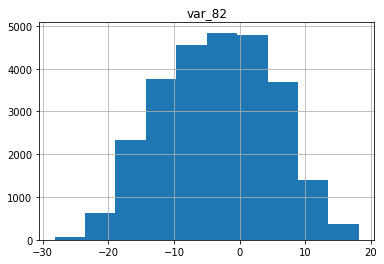

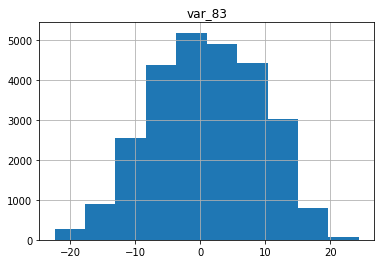

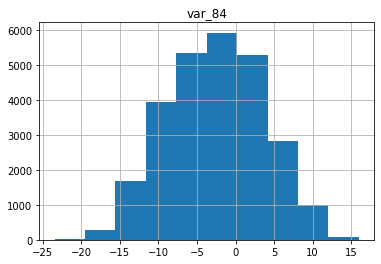

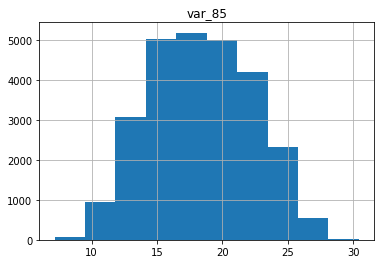

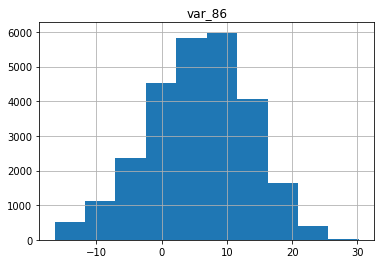

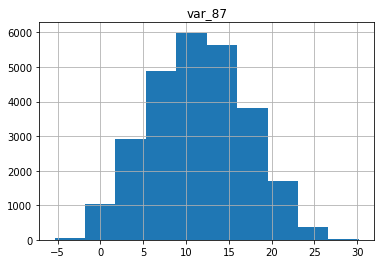

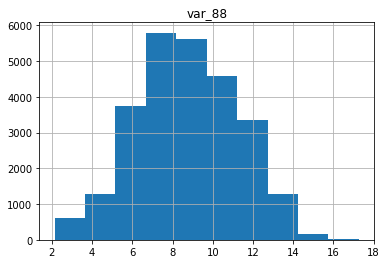

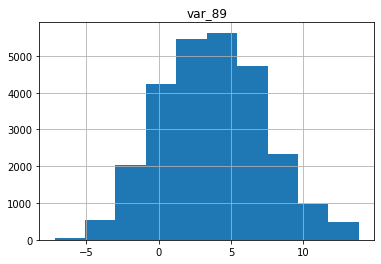

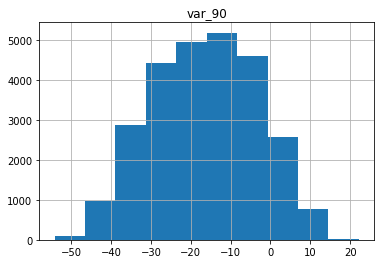

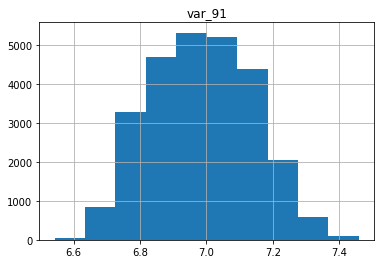

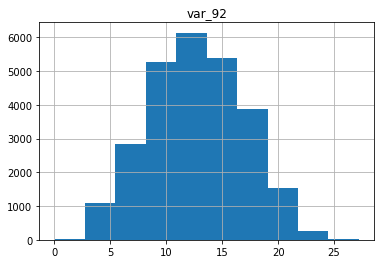

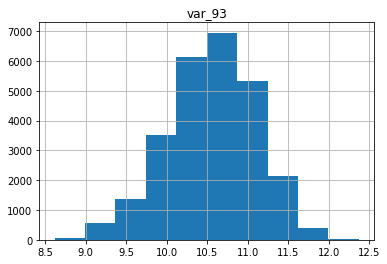

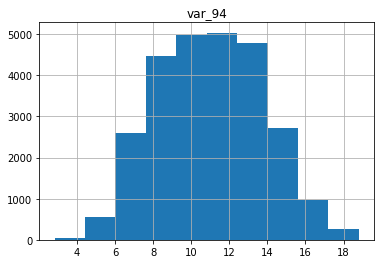

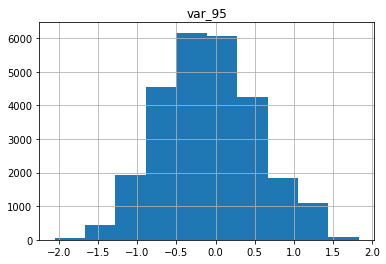

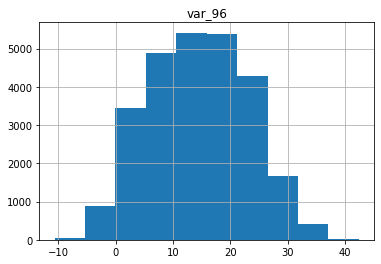

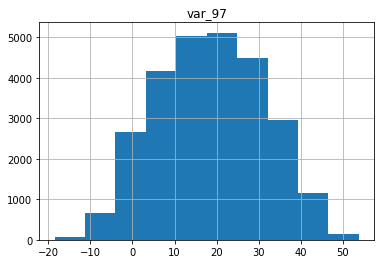

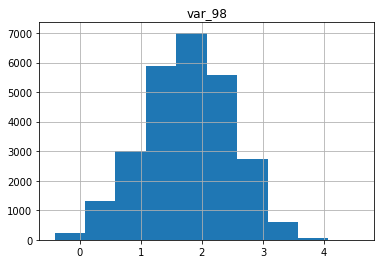

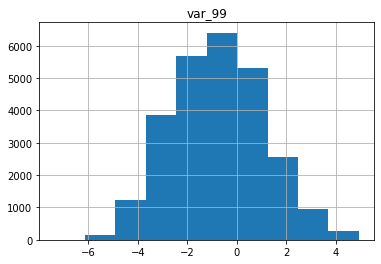

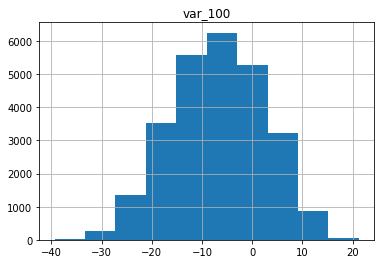

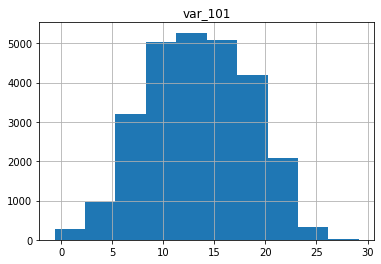

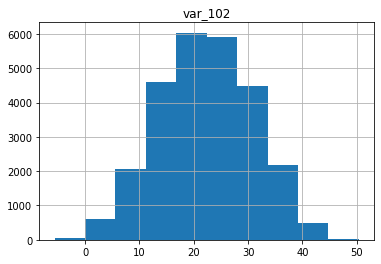

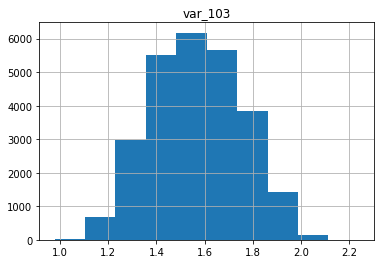

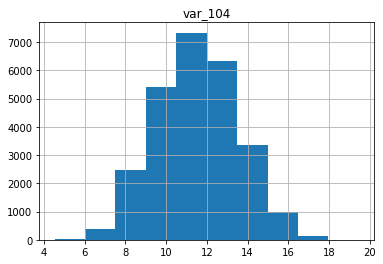

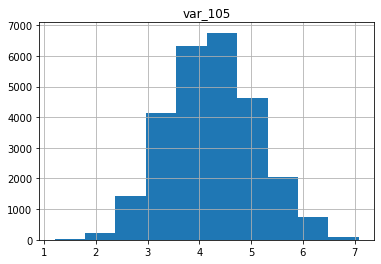

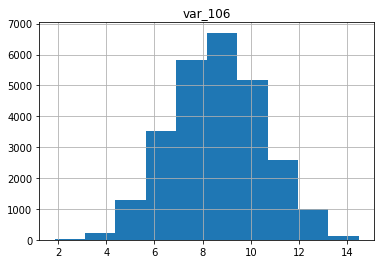

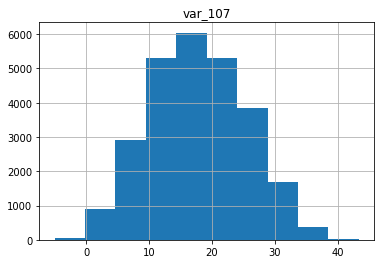

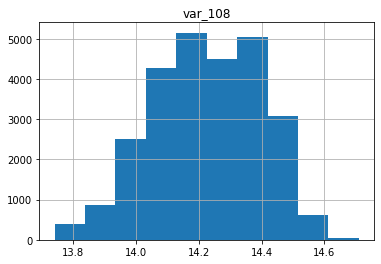

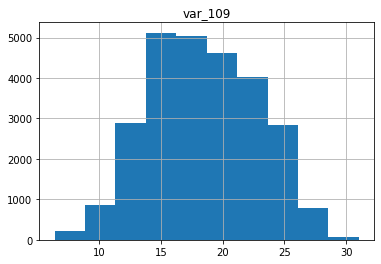

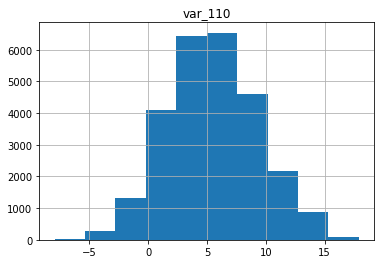

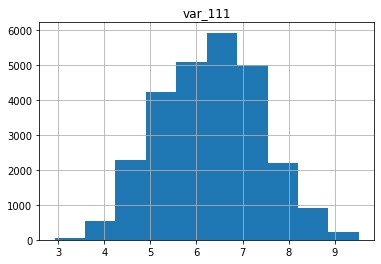

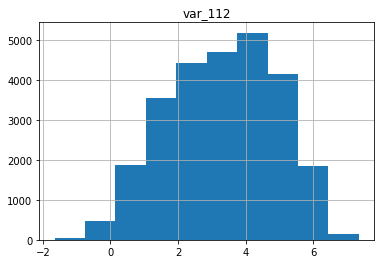

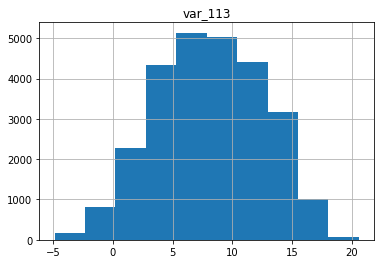

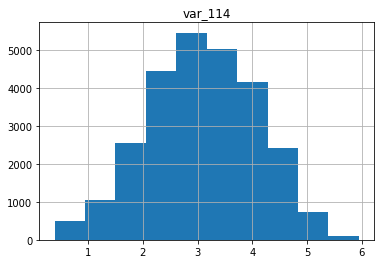

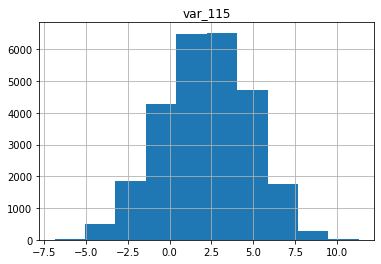

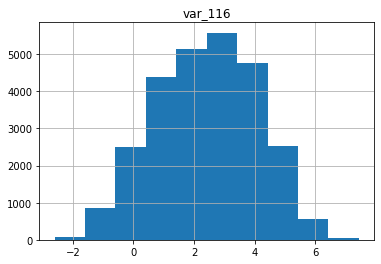

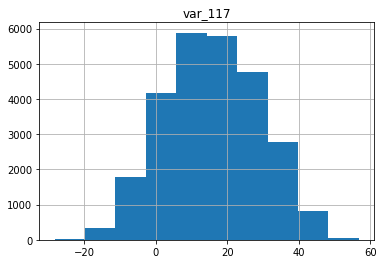

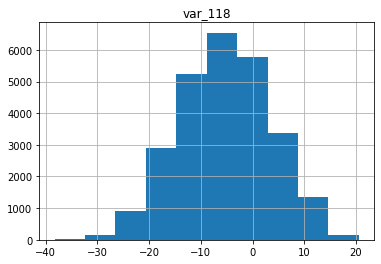

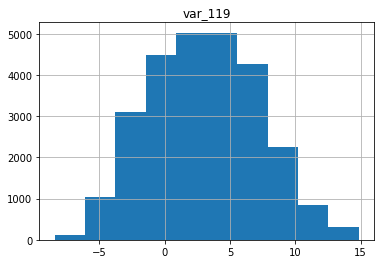

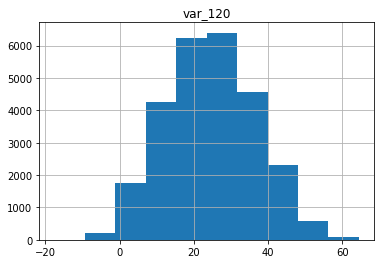

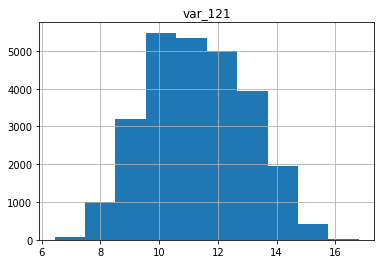

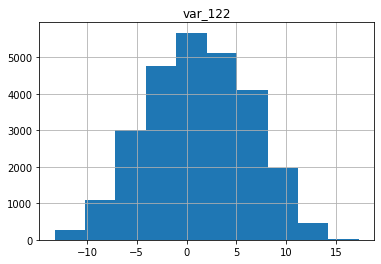

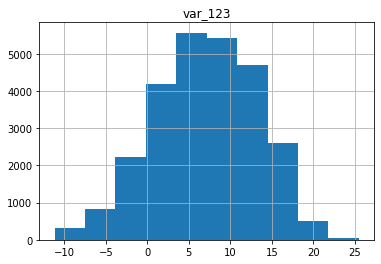

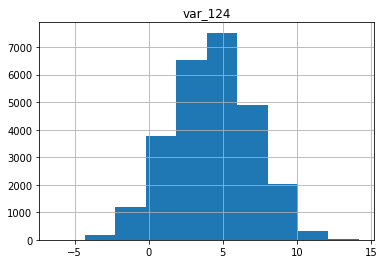

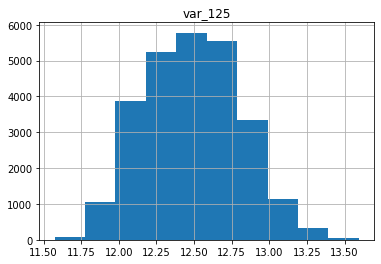

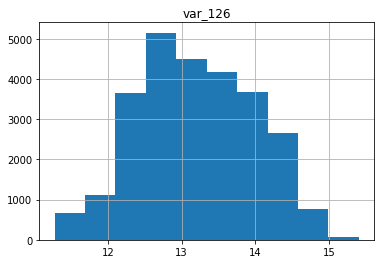

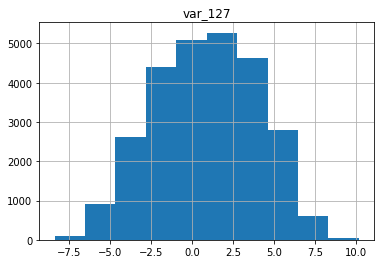

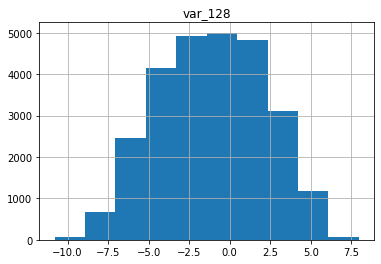

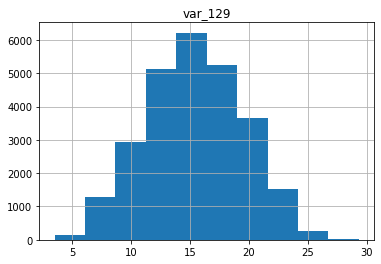

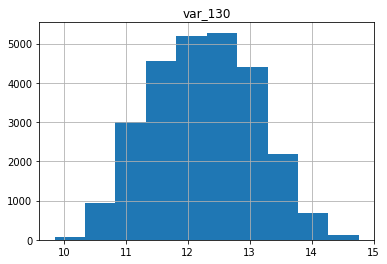

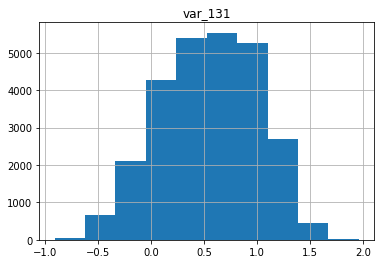

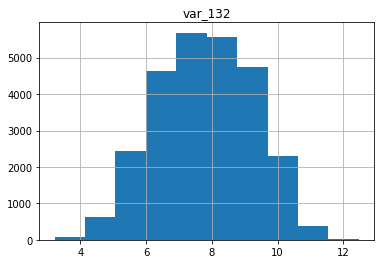

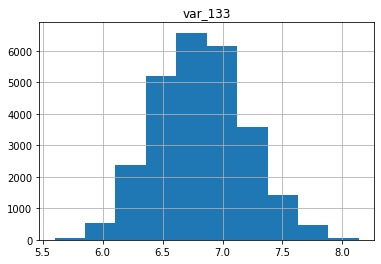

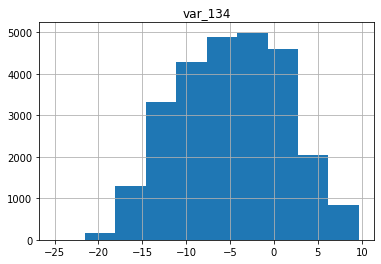

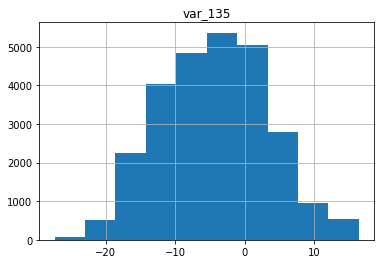

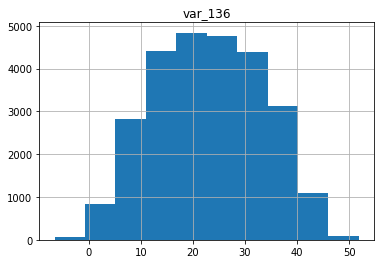

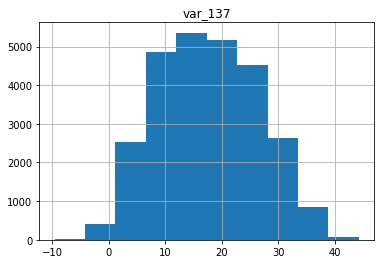

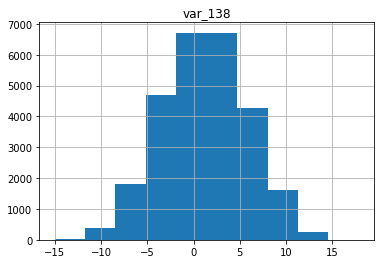

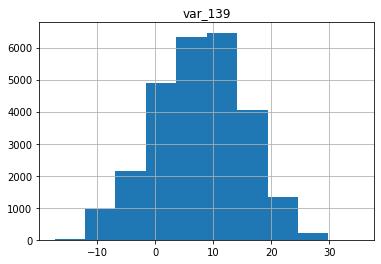

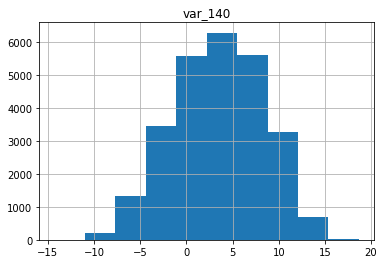

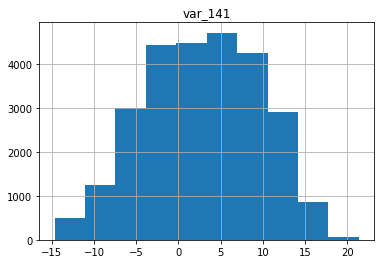

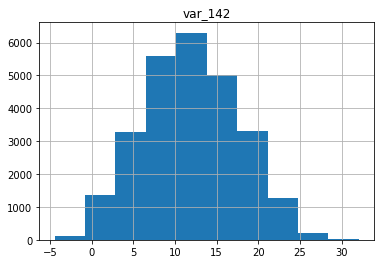

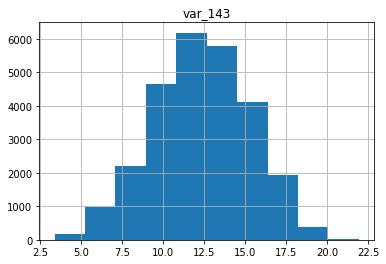

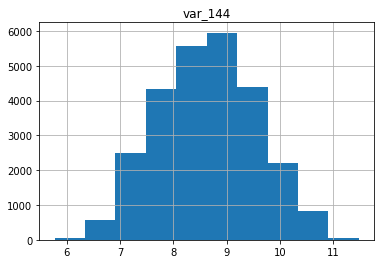

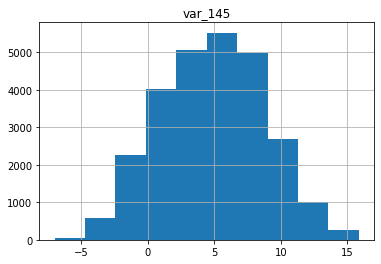

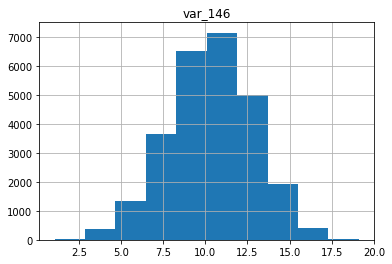

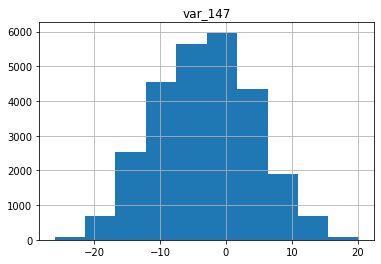

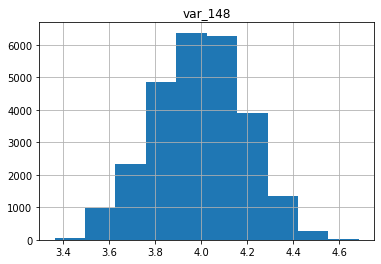

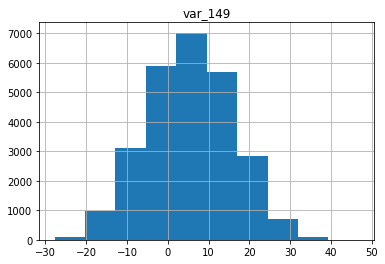

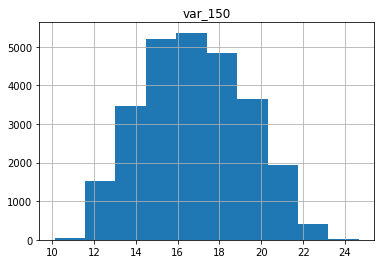

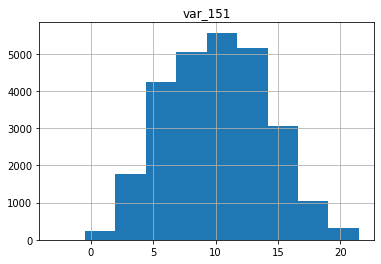

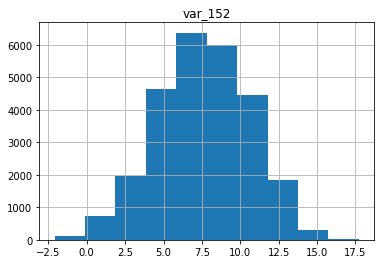

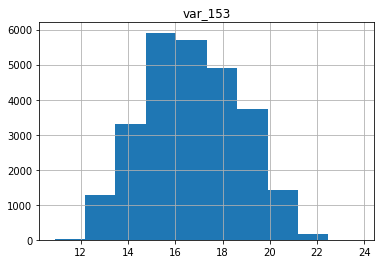

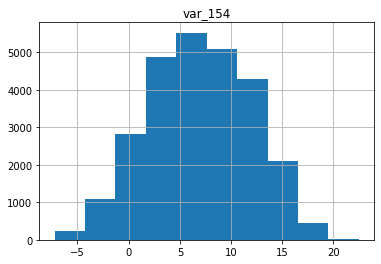

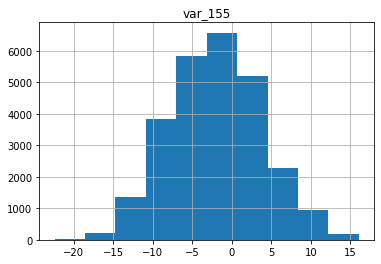

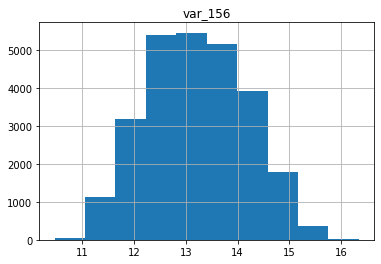

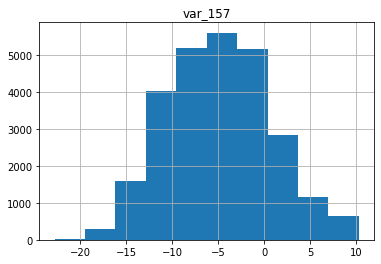

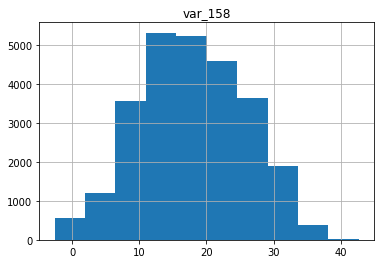

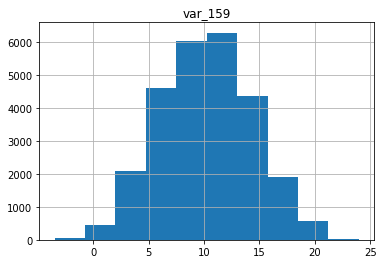

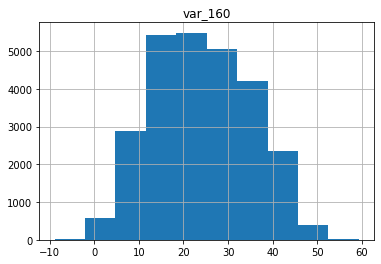

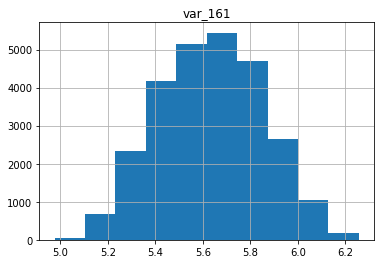

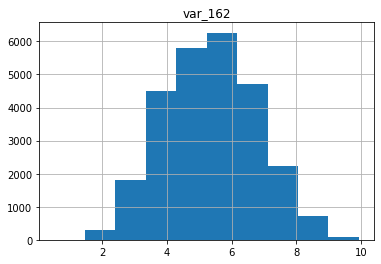

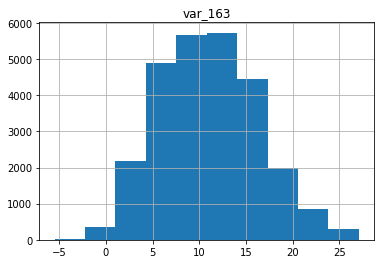

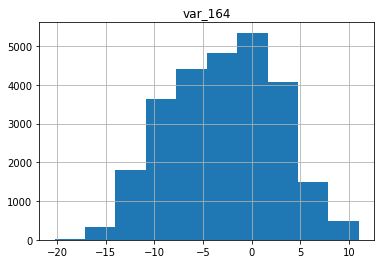

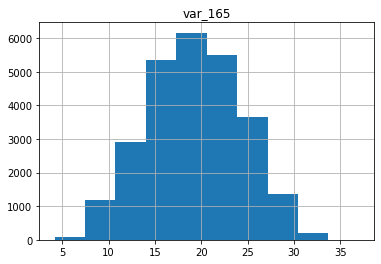

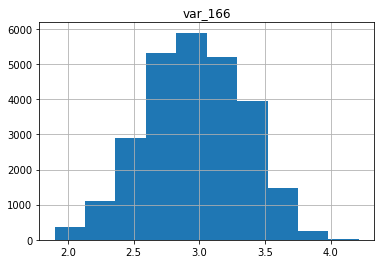

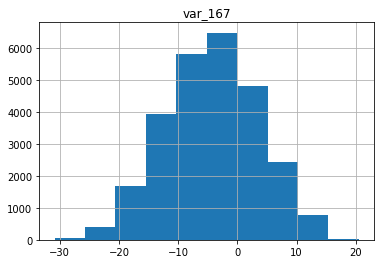

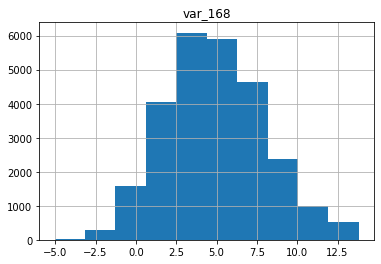

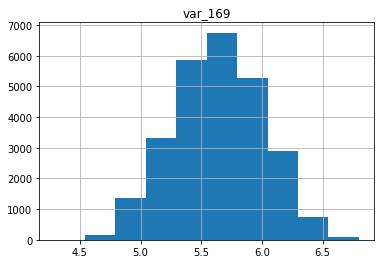

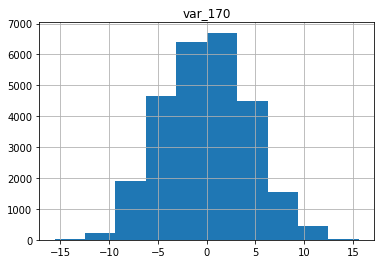

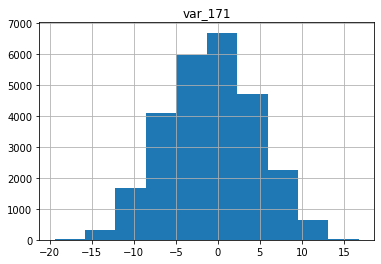

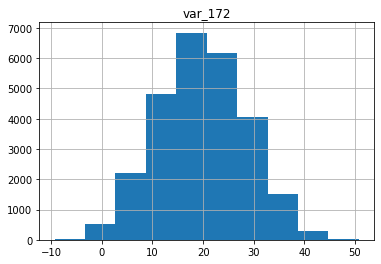

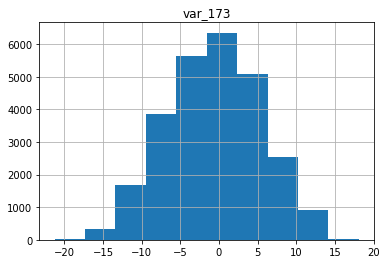

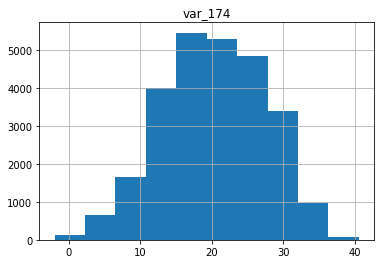

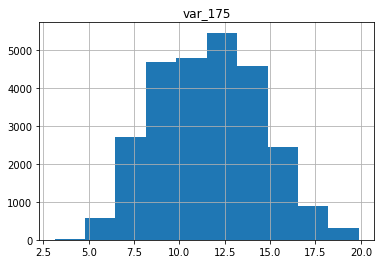

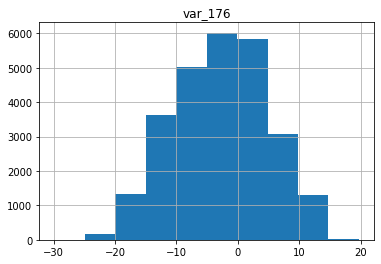

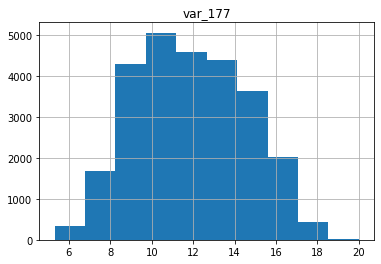

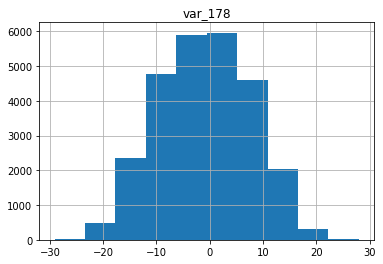

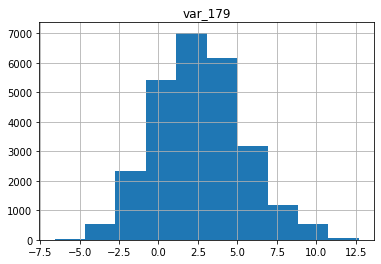

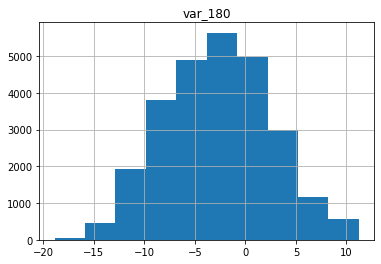

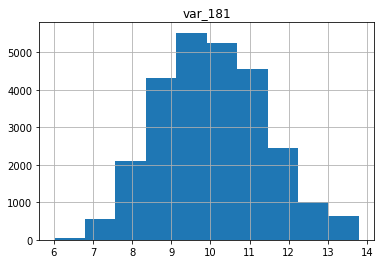

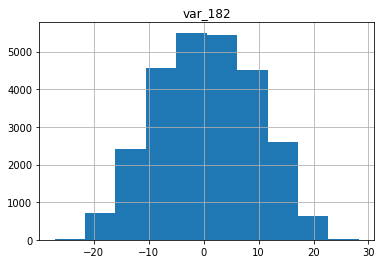

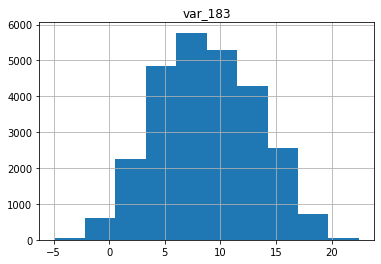

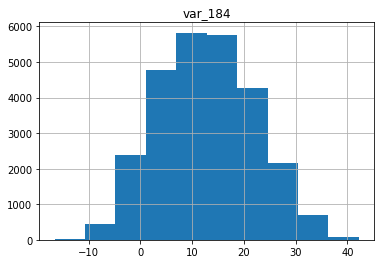

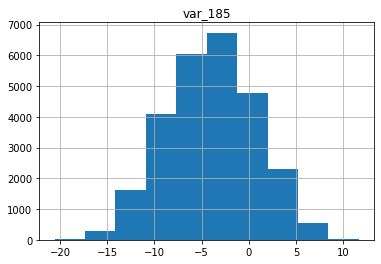

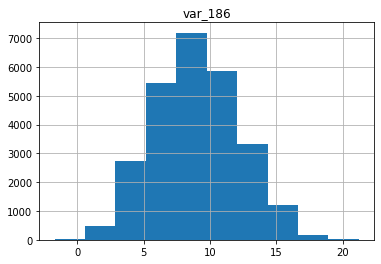

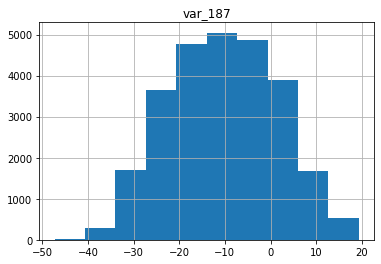

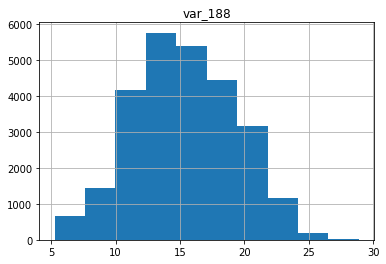

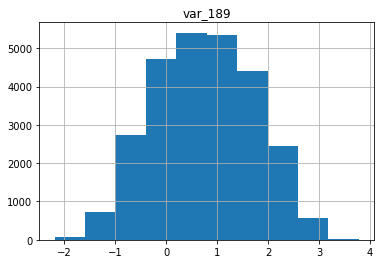

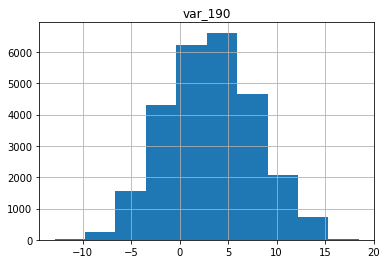

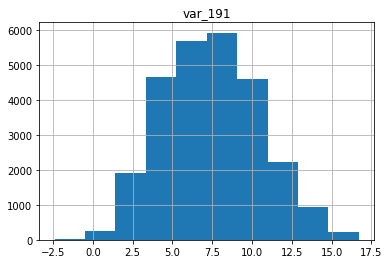

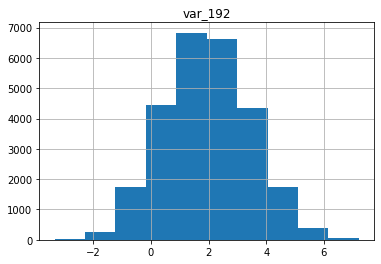

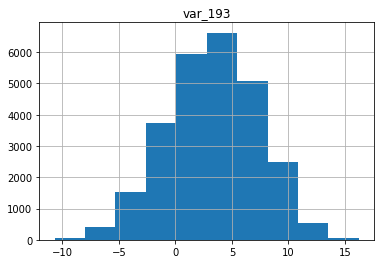

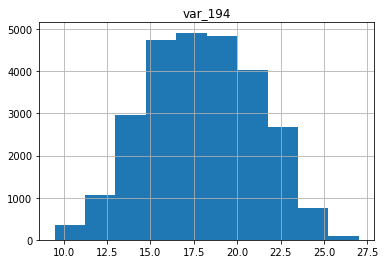

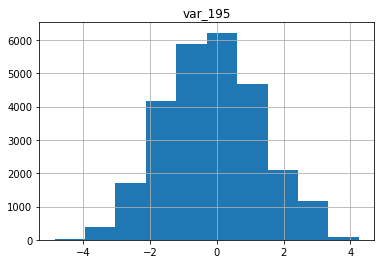

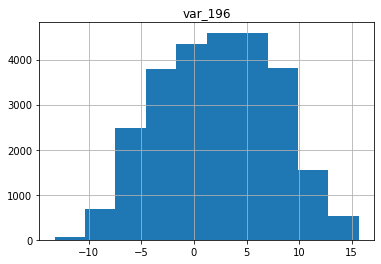

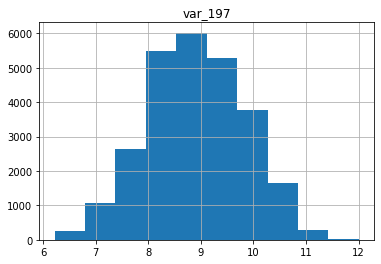

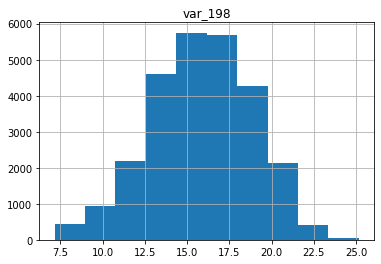

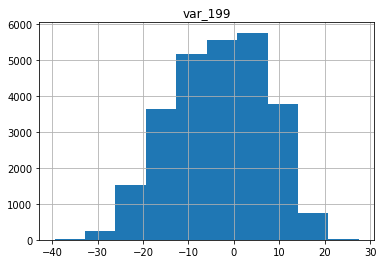

In [10]:
# show histograms of data columns
# select numerical features
train_num_columns = app_test.select_dtypes(include=['int64', 'float64']).columns
print('num_columns =', train_num_columns, '\n')
for col in train_num_columns:
  app_test.hist(col)
  plt.show();

In [0]:
# Let's plot the scatter plot for train and test set for a few of the features
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        plt.scatter(df1[feature], df2[feature], marker='+')
        plt.xlabel(feature, fontsize=9)
    plt.show();

<Figure size 432x288 with 0 Axes>

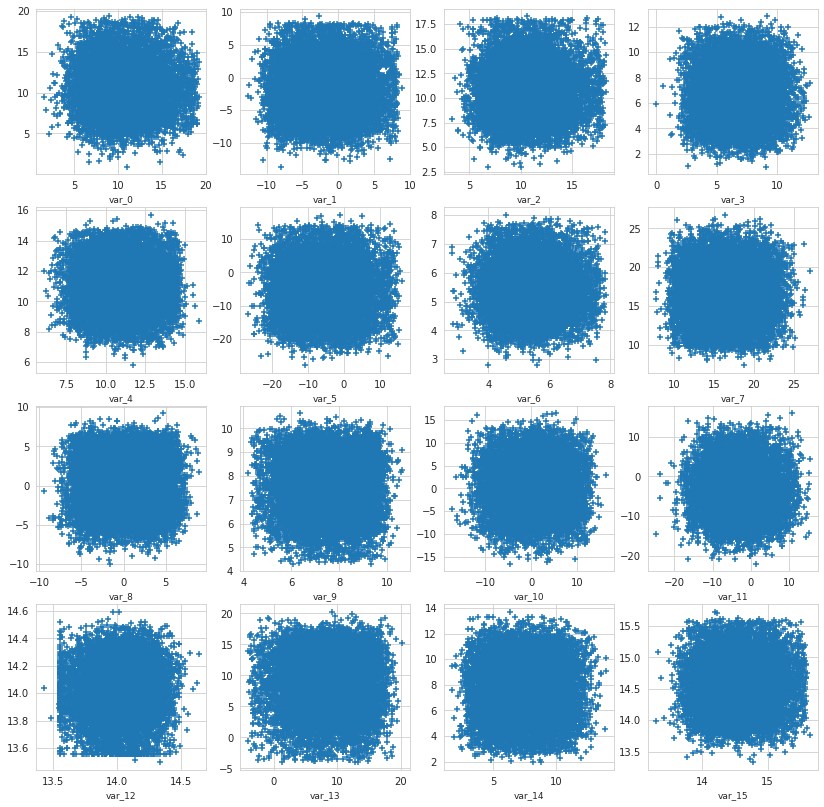

In [0]:
# We will show just 5% of the data. 
# On x axis we show train values and on the y axis we show the test values
features = ['var_0', 'var_1','var_2','var_3', 'var_4', 'var_5', 'var_6', 'var_7', 
           'var_8', 'var_9', 'var_10','var_11','var_12', 'var_13', 'var_14', 'var_15', 
           ]
plot_feature_scatter(app_train[::20],app_test[::20], features)

In [0]:
# Let's show now the density plot of variables in train dataset
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();


<Figure size 432x288 with 0 Axes>

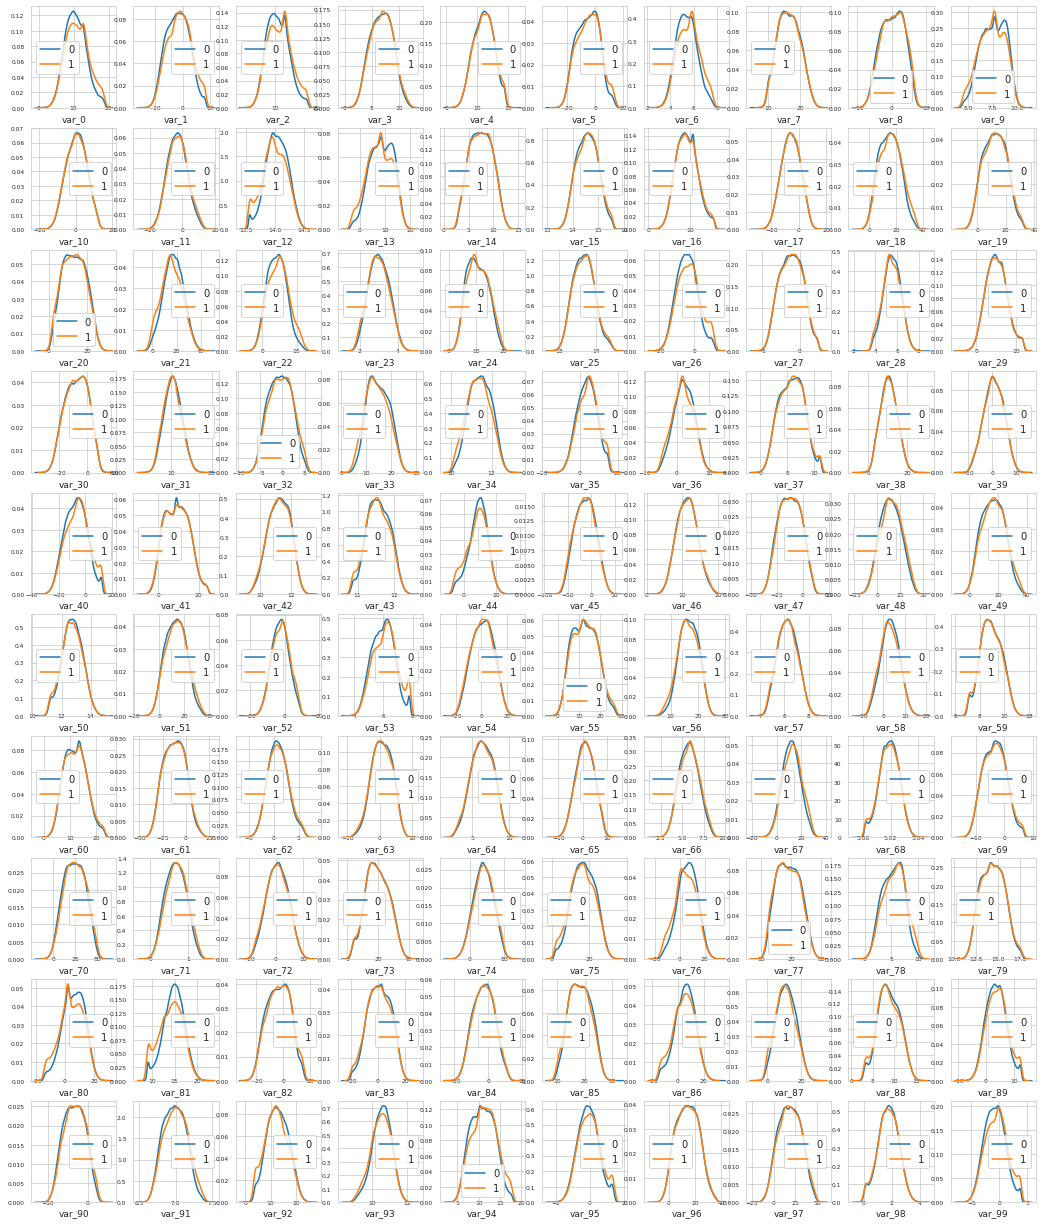

In [0]:
t0 = app_train.loc[app_train['target'] == 0]
t1 = app_train.loc[app_train['target'] == 1]
features = app_train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

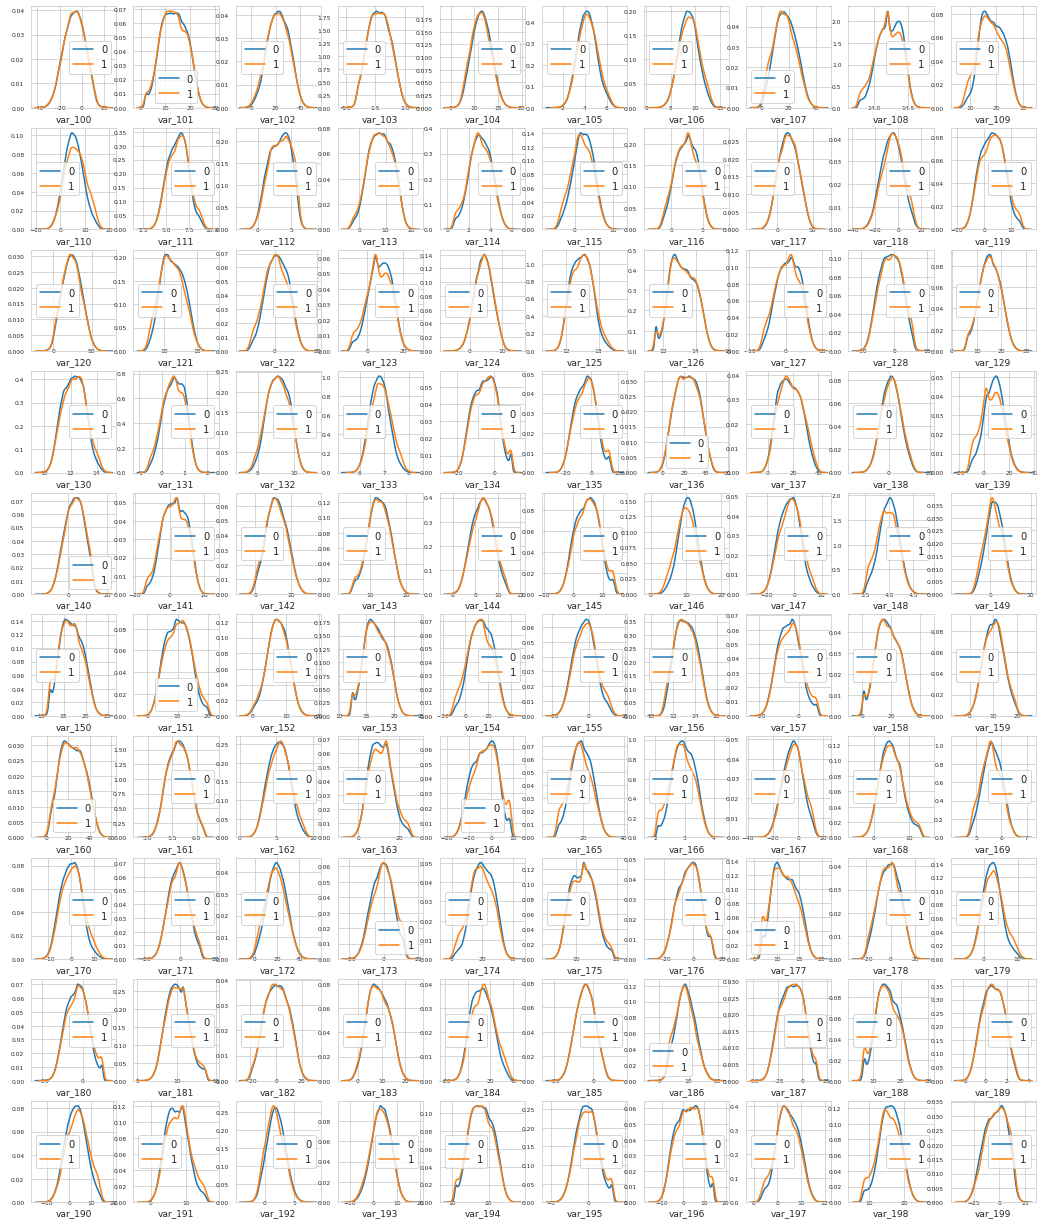

In [0]:
# The next 100 values are displayed in the following cell
features = app_train.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)



We can observe that there is a considerable number of features with significant different distribution for the two target values.
For example, var_0, var_1, var_2, var_5, var_9, var_13, var_106, var_109, var_139 and many others.

Also some features, like var_2, var_13, var_26, var_55, var_175, var_184, var_196 shows a distribution that resambles to a bivariate distribution.

We will take this into consideration in the future for the selection of the features for our prediction model.

<Figure size 432x288 with 0 Axes>

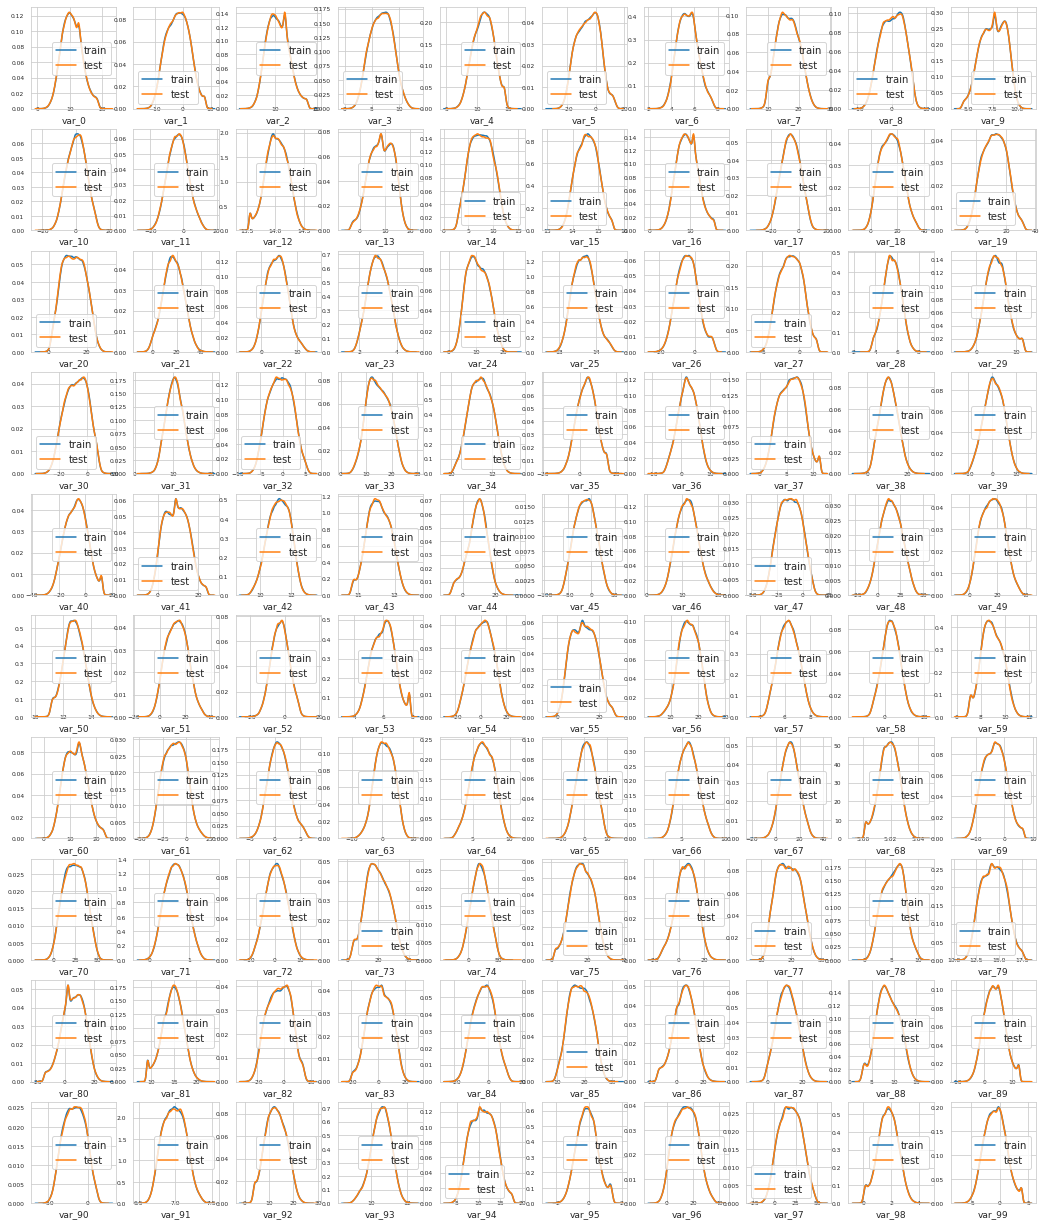

In [0]:
# Let's now look to the distribution of the same features in parallel in train and test datasets.
features = app_train.columns.values[2:102]
plot_feature_distribution(app_train, app_test, 'train', 'test', features)

<Figure size 432x288 with 0 Axes>

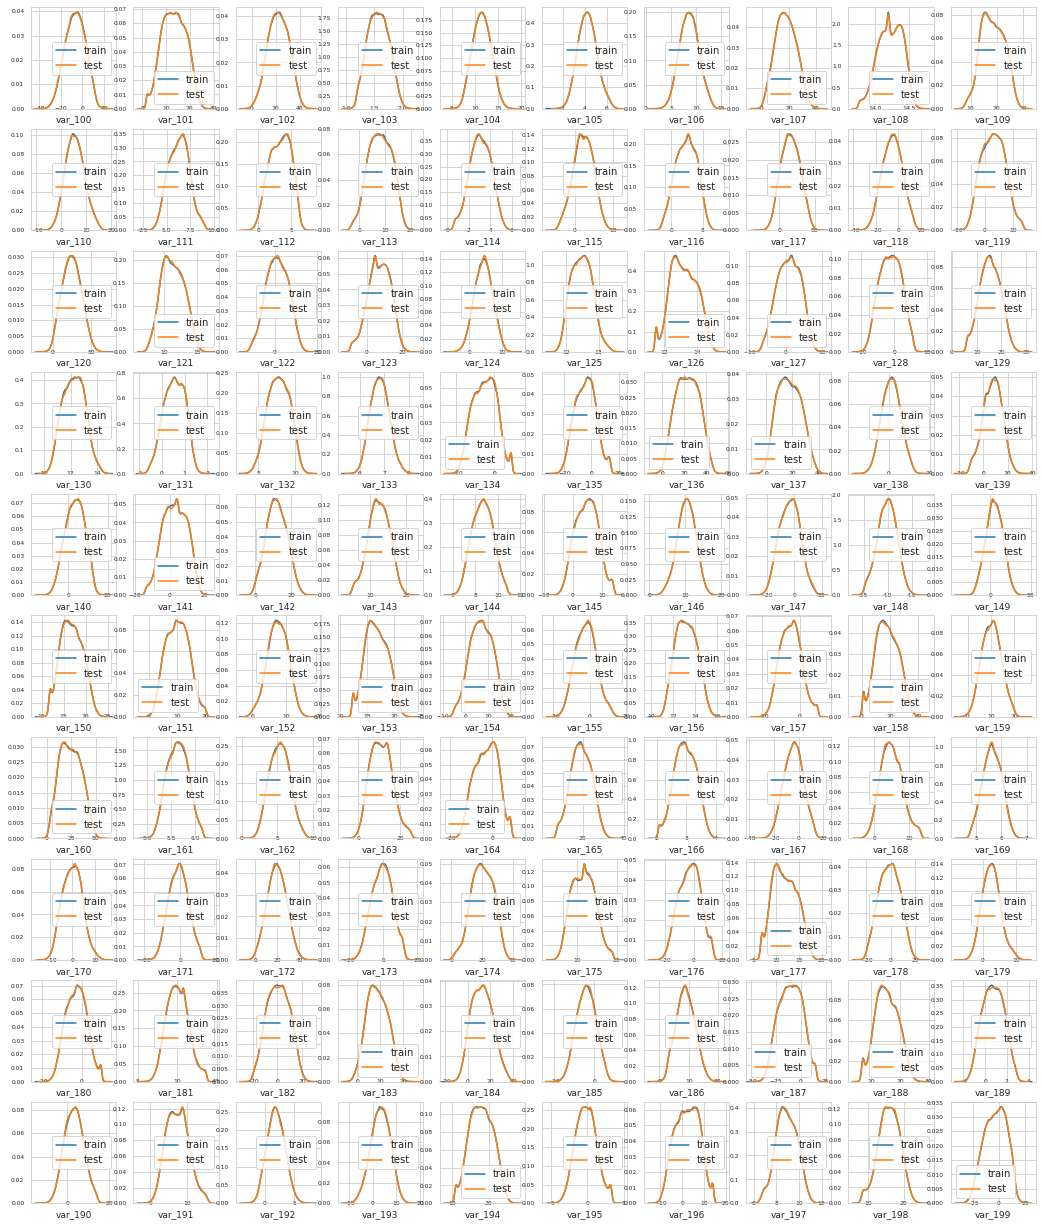

In [0]:
features = app_train.columns.values[102:202]
plot_feature_distribution(app_train, app_test, 'train', 'test', features)

The train and test seems to be well ballanced with respect with distribution of the numeric variables.

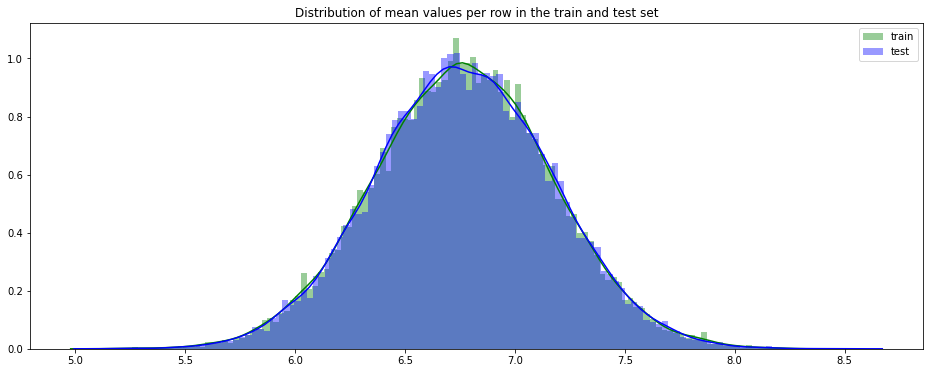

In [11]:
# Let's check the distribution of the mean values per row in the train and test set.

plt.figure(figsize=(16,6))
features = app_train.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(app_train[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(app_test[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()


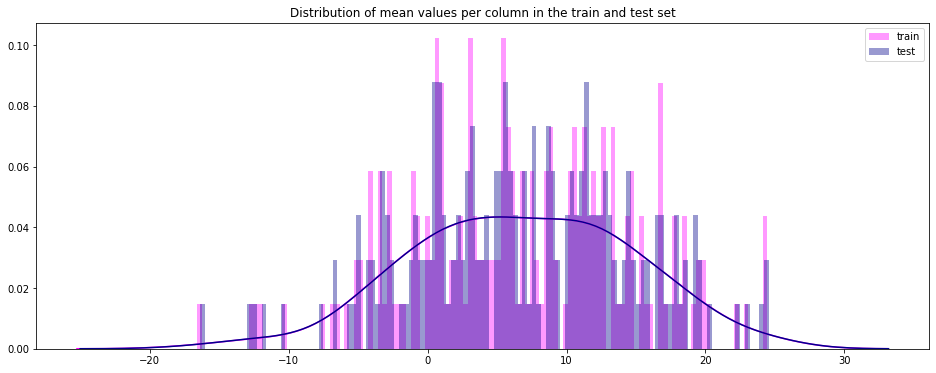

In [13]:
# Let's check the distribution of the mean values per columns in the train and test set.
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(app_train[features].mean(axis=0),color="magenta",kde=True,bins=120, label='train')
sns.distplot(app_test[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [14]:
# Find correlations with the target and sort
correlations = app_train.corr()['target'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 var_184    0.047379
var_190    0.049502
var_22     0.049904
var_94     0.049967
var_173    0.050728
var_40     0.051563
var_110    0.052090
var_18     0.052959
var_6      0.053386
var_179    0.054130
var_2      0.057481
var_1      0.059674
var_26     0.061705
var_53     0.068747
target     1.000000
Name: target, dtype: float64

Most Negative Correlations:
 var_81    -0.072476
var_12    -0.072475
var_174   -0.072381
var_139   -0.069936
var_115   -0.065079
var_44    -0.063918
var_165   -0.063216
var_33    -0.062536
var_146   -0.061907
var_169   -0.057061
var_75    -0.056714
var_166   -0.056585
var_21    -0.054952
var_198   -0.054136
var_148   -0.053638
Name: target, dtype: float64


In [18]:
# calculate the correlations between the features in train set
correlations = app_train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
print("\nleast correlated\n")
correlations.head(10)


most correlated



level_0  level_1             0
0   var_21  var_199  4.727593e-07
1  var_199   var_21  4.727593e-07
2   var_85   var_90  4.747127e-07
3   var_90   var_85  4.747127e-07
4  var_114   var_72  1.745010e-06
5   var_72  var_114  1.745010e-06
6  var_128  var_133  2.488661e-06
7  var_133  var_128  2.488661e-06
8  var_181   var_70  3.587320e-06
9   var_70  var_181  3.587320e-06

In [19]:
print("\nmost correlated\n")
correlations.tail(10)


least correlated



level_0  level_1         0
39790  var_147  var_186  0.026609
39791  var_186  var_147  0.026609
39792  var_109   var_24  0.026611
39793   var_24  var_109  0.026611
39794   var_72  var_187  0.026816
39795  var_187   var_72  0.026816
39796   var_26  var_136  0.027664
39797  var_136   var_26  0.027664
39798  var_176   var_15  0.031541
39799   var_15  var_176  0.031541

#Feature Engineering

In [0]:
# consider adding features like min, max sum, mean, median, skew

# consider adding rounded values for each column


# Model

In [0]:
# From the train columns list, we drop the ID and target to form the features list.
features = [c for c in app_train.columns if c not in ['ID_code', 'target']]
target = app_train['target']

•	Boosting 
  –	Instead of training variant decision trees in parallel, we train them sequentially
  –	At every iteration:
    •	Calculate the accuracy (training error)
    •	Prioritize training data that previous iterations mis-classified
  –	The goal for every tree is to solve for net error from the prior tree
  –	A record’s priority is expressed as weight relative to other records
    •	Randomly select a subset of the data for the next iteration
  –	Each subsequent tree is more accurate than the previous trees
  –	Form the final strong classifier as the combination of all the classifiers, with more weight given to more accurate classifiers

•	Gradient Boosting
  –	Like boosting, but use gradient descent at every step to choose the next best data set that maximizes training gain


In [0]:
# Use lightgbm - Light Gradient Boosting framework
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

In [0]:


# We define the hyperparameters for the model
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}


We will use k-fold cross validation on our lightgbm model.

see https://machinelearningmastery.com/k-fold-cross-validation/

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. 

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

    Shuffle the dataset randomly.
    Split the dataset into k groups
    For each unique group:
        Take the group as a hold out or test data set
        Take the remaining groups as a training data set
        Fit a model on the training set and evaluate it on the test set
        Retain the evaluation score and discard the model
    Summarize the skill of the model using the sample of model evaluation scores

For example:

    Model1: Trained on Fold1 + Fold2, Tested on Fold3
    Model2: Trained on Fold2 + Fold3, Tested on Fold1
    Model3: Trained on Fold1 + Fold3, Tested on Fold2

The models are then discarded after they are evaluated as they have served their purpose.

The skill scores are collected for each model and summarized for use.



In [26]:
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
oof = np.zeros(len(app_train))
predictions = np.zeros(len(app_test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(app_train.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(app_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(app_train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(app_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(app_test[features], num_iteration=clf.best_iteration) / folds.n_splits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Fold 0
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.965823	valid_1's auc: 0.87301
[2000]	training's auc: 0.982321	valid_1's auc: 0.879118
[3000]	training's auc: 0.991628	valid_1's auc: 0.878589
[4000]	training's auc: 0.99633	valid_1's auc: 0.876176
Early stopping, best iteration is:
[1571]	training's auc: 0.976734	valid_1's auc: 0.879984
Fold 1
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.967357	valid_1's auc: 0.881492
[2000]	training's auc: 0.98301	valid_1's auc: 0.888147
[3000]	training's auc: 0.991961	valid_1's auc: 0.889135
[4000]	training's auc: 0.996499	valid_1's auc: 0.888634
[5000]	training's auc: 0.998763	valid_1's auc: 0.889829
[6000]	training's auc: 0.999648	valid_1's auc: 0.889721
[7000]	training's auc: 0.999927	valid_1's auc: 0.887646
[8000]	training's auc: 0.999989	valid_1's auc: 0.886644
Early stopping, best iteration is:
[5186]	training's auc: 0.999012	valid_1's auc: 0.890352
Fold 2


NameError: ignored

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve
print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

CV score: 0.87842 


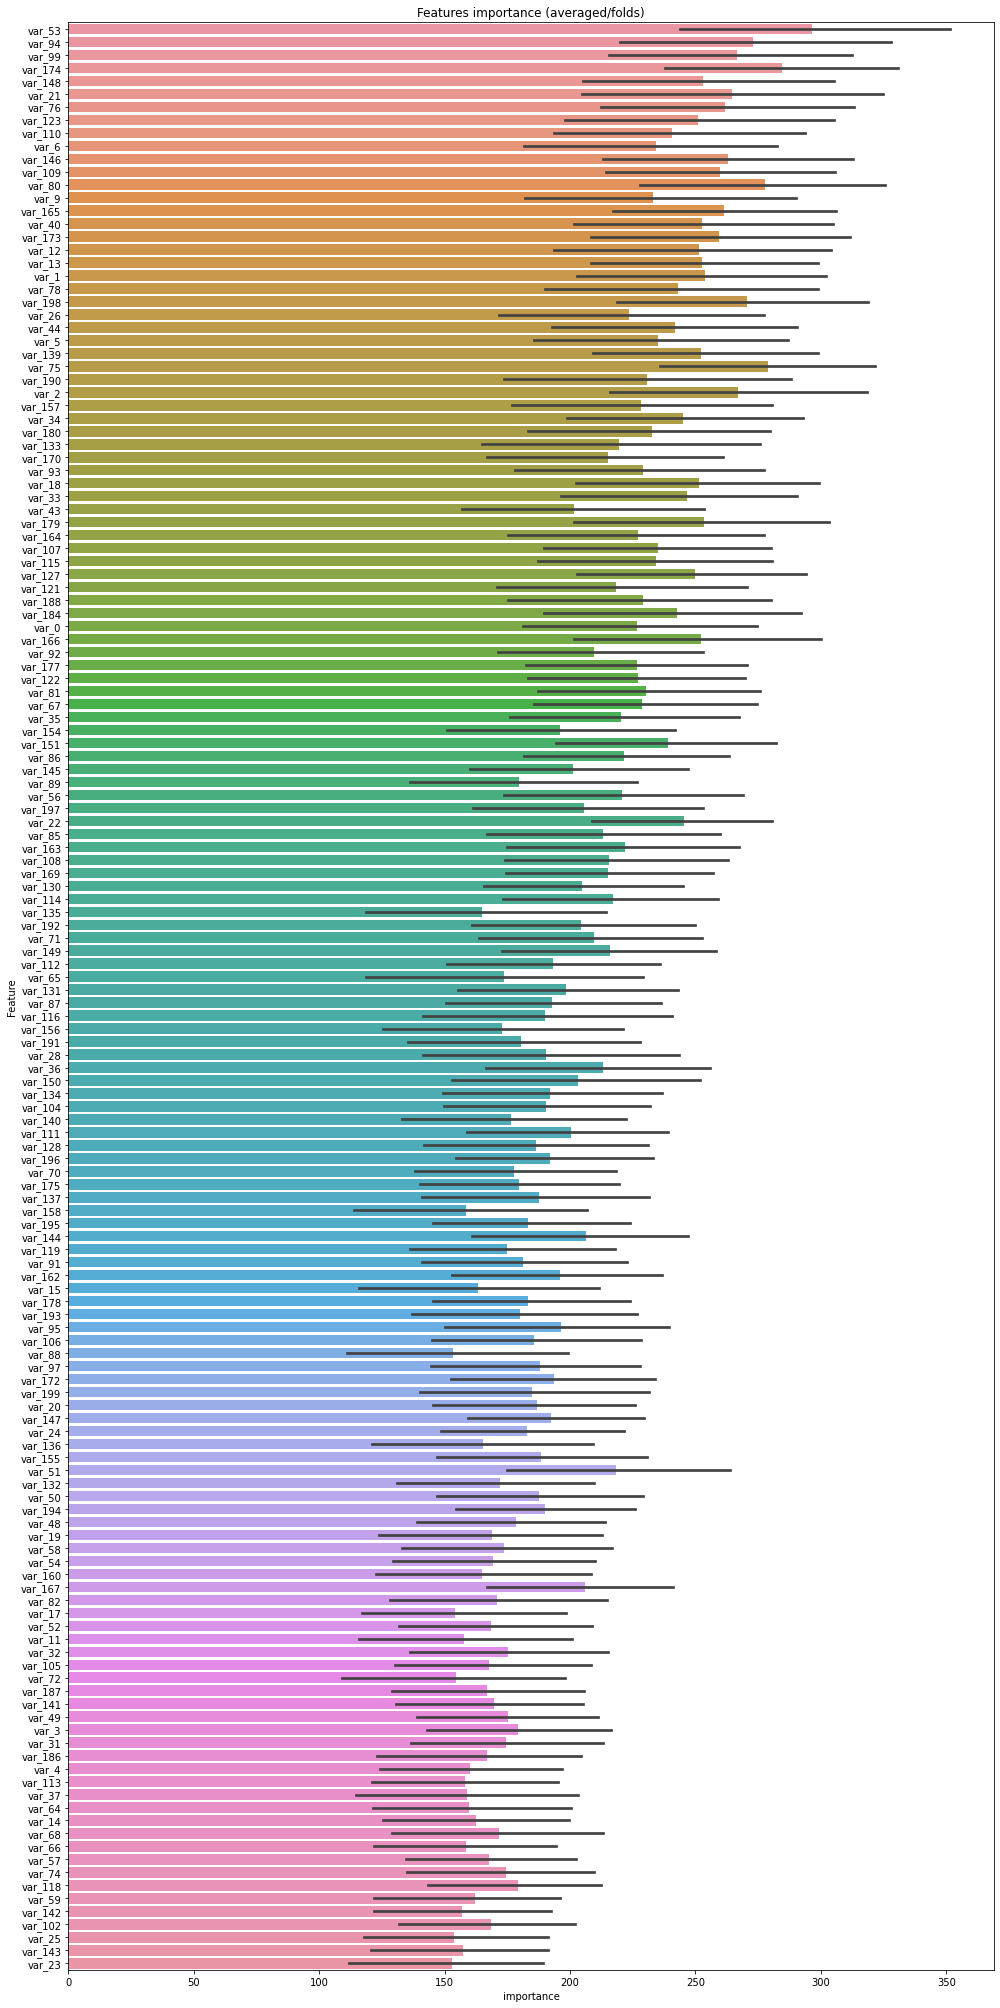

In [28]:
# Let's check the feature importance.
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI.png')

In [0]:
# submit the answer
sub_df = pd.DataFrame({"ID_code":app_test["ID_code"].values})
sub_df["target"] = predictions
sub_df.to_csv("submission.csv", index=False)